In [2]:
## Importing the required libraries 

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

In [3]:
## Reading the input data 
inp_fl=pd.read_csv('telecom_churn_data.csv')
inp_fl.info()

## data has around 230 columna and 100K rows. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Understanding the input Data

In [4]:
inp_fl.shape

(99999, 226)

In [5]:
## Checking for the NULL values in the columns
inp_fl.isna().sum().any()

## There are NULL values present in the columns, lets check which all columns have the missing values

True

In [6]:
# Set pandas display options to show more rows and columns to show all the records as needed
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [7]:
print(inp_fl.isna().sum()/len(inp_fl)*100)

## Most of the columns have less that 10% of the NULL values present in it, so it should be good enough to use those

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [8]:
### Check if we have unique customers 
inp_fl.mobile_number.nunique()

99999

In [9]:
inp_fl.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [10]:
## Columns of importance to tag as churn 
##  total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

churn_check=inp_fl[['mobile_number','total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mobile_number   99999 non-null  int64  
 1   total_ic_mou_9  99999 non-null  float64
 2   total_og_mou_9  99999 non-null  float64
 3   vol_2g_mb_9     99999 non-null  float64
 4   vol_3g_mb_9     99999 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 3.8 MB


In [11]:
churn_check.head()

,mobile_number,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,7000842753,0.00,0.00,0.0,0.00
1,7001865778,188.04,72.11,0.0,0.00
2,7001625959,517.74,124.94,0.0,8.42
3,7001204172,305.38,362.54,0.0,0.00
4,7000142493,205.31,104.59,0.0,0.00


In [12]:
churn_check['churn']=np.where((churn_check['total_ic_mou_9']==0) &
                              (churn_check['total_og_mou_9']==0) &
                              (churn_check['vol_2g_mb_9']==0) &
                              (churn_check['vol_3g_mb_9']==0), 1,0)
churn_check.head()

/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/2126843347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_check['churn']=np.where((churn_check['total_ic_mou_9']==0) &


,mobile_number,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,7000842753,0.00,0.00,0.0,0.00,1
1,7001865778,188.04,72.11,0.0,0.00,0
2,7001625959,517.74,124.94,0.0,8.42,0
3,7001204172,305.38,362.54,0.0,0.00,0
4,7000142493,205.31,104.59,0.0,0.00,0


In [13]:
churn_check['churn'].value_counts()/len(churn_check)*100

## As per the logic to tag churners based on the 9th month's behaviour, i.e. no call and no usage
## only around 10% of customers are there who have churned which makes this problem highly imbalanced in 
## nature

0    89.808898
1    10.191102
Name: churn, dtype: float64

In [14]:
inp_tag=pd.merge(inp_fl,churn_check[['mobile_number','churn']],on='mobile_number',how='inner')
inp_tag.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,Na

### Building the data set for EDA and Modelling 

In [15]:
## we have to split the data based on columns , such that churn behaviour is trained on columns ,6,7,8 and 9th is 
## used for the prediction purpose
all_columns=inp_tag.columns
all_columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'churn'],
      dtype='object', length=227)

In [16]:
month9_cols=[col for col in all_columns if '_9' in col]

In [17]:
## rest of the columns
rest_columns=[col for col in all_columns if col not in month9_cols]

In [18]:
## base data preparation
base_df=inp_tag[rest_columns]
base_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,6/29/2014,7/31/2014,8/28/2014,

In [19]:
## Check if customers belonging to particular circles 
base_df.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

#### Now understanding Usage, recharge, functionality etc, which will describe how the customer behaviour changes

In [20]:
## Understanding the recharge schedule and making features of the recharge. 
## Assumption is if recharge amount is decreasing or diminishing then that can be a signal towards churning

recharge_cols=[col for col in rest_columns if 'rech' in col]
recharge_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [21]:
recharge_df=base_df[['mobile_number']+recharge_cols+['churn']]
recharge_df.tail()

,mobile_number,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,churn
99994,7001548952,2,3,2,60,110,0,60,110,0,6/3/2014,7/20/2014,8/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
99995,7000607688,5,3,2,110,110,182,110,110,149,6/17/2014,7/17/2014,8/24/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
99996,7000087541,5,2,0,119,0,0,50,0,0,6/13/2014,7/26/2014,NaN,6/13/2014,NaN,NaN,2.0,NaN,NaN,25.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,39.0,NaN,NaN,1
99997,7000498689,3,4,4,381,358,716,202,179,179,6/17/2014,7/19/2014,8/20/2014,6/17/2014,7/19/2014,8/20/2014,3.0,2.0,4.0,202.0,179.0,179.0,1.0,0.0,0.0,2.0,2.0,4.0,583.0,358.0,716.0,0
99998,7001905007,5,0,0,710,0,0,175,0,0,6/16/2014,NaN,NaN,6/11/2014,NaN,NaN,1.0,NaN,NaN,154.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,154.0,NaN,NaN,1


In [22]:
## We can keep overall recharge as one and data recharge as just a boost to base recharge 
recharge_df['total_rech_data_6'].fillna(0,inplace=True)
recharge_df['total_rech_data_7'].fillna(0,inplace=True)
recharge_df['total_rech_data_8'].fillna(0,inplace=True)

recharge_df['av_rech_amt_data_6'].fillna(0,inplace=True)
recharge_df['av_rech_amt_data_7'].fillna(0,inplace=True)
recharge_df['av_rech_amt_data_8'].fillna(0,inplace=True)


/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/3265603254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recharge_df['total_rech_data_6'].fillna(0,inplace=True)
/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/3265603254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recharge_df['total_rech_data_7'].fillna(0,inplace=True)
/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/3265603254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [23]:
recharge_df.tail()

,mobile_number,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,churn
99994,7001548952,2,3,2,60,110,0,60,110,0,6/3/2014,7/20/2014,8/26/2014,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0
99995,7000607688,5,3,2,110,110,182,110,110,149,6/17/2014,7/17/2014,8/24/2014,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0
99996,7000087541,5,2,0,119,0,0,50,0,0,6/13/2014,7/26/2014,NaN,6/13/2014,NaN,NaN,2.0,0.0,0.0,25.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,39.0,0.0,0.0,1
99997,7000498689,3,4,4,381,358,716,202,179,179,6/17/2014,7/19/2014,8/20/2014,6/17/2014,7/19/2014,8/20/2014,3.0,2.0,4.0,202.0,179.0,179.0,1.0,0.0,0.0,2.0,2.0,4.0,583.0,358.0,716.0,0
99998,7001905007,5,0,0,710,0,0,175,0,0,6/16/2014,NaN,NaN,6/11/2014,NaN,NaN,1.0,0.0,0.0,154.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,154.0,0.0,0.0,1


In [24]:
## Only using recharge and data information to understand the behaviour
## drop columns with NAs in it
recharge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   total_rech_num_6          99999 non-null  int64  
 2   total_rech_num_7          99999 non-null  int64  
 3   total_rech_num_8          99999 non-null  int64  
 4   total_rech_amt_6          99999 non-null  int64  
 5   total_rech_amt_7          99999 non-null  int64  
 6   total_rech_amt_8          99999 non-null  int64  
 7   max_rech_amt_6            99999 non-null  int64  
 8   max_rech_amt_7            99999 non-null  int64  
 9   max_rech_amt_8            99999 non-null  int64  
 10  date_of_last_rech_6       98392 non-null  object 
 11  date_of_last_rech_7       98232 non-null  object 
 12  date_of_last_rech_8       96377 non-null  object 
 13  date_of_last_rech_data_6  25153 non-null  object 
 14  date_o

In [25]:
## Instead of Dates we can change it to days since the last recharge and average days inbetween the recharges. 
recharge_df[recharge_df['date_of_last_rech_6'].isna()].head()

## It can be seen that people either entered into the system after 6th month and maybe they were there in the system 
## but left the system before the 9th month (assuming both 7th and 8th months has no recharge in it

,mobile_number,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,churn
26,7000335166,0,6,4,0,154,25,0,154,25,NaN,7/27/2014,8/25/2014,NaN,7/27/2014,8/25/2014,0.0,1.0,2.0,NaN,154.0,25.0,NaN,1.0,2.0,NaN,0.0,0.0,0.0,154.0,50.0,0
91,7000160837,0,9,14,0,169,139,0,50,20,NaN,7/27/2014,8/27/2014,NaN,7/27/2014,8/23/2014,0.0,7.0,7.0,NaN,17.0,17.0,NaN,7.0,7.0,NaN,0.0,0.0,0.0,119.0,119.0,0
187,7000375019,0,3,4,0,148,148,0,98,98,NaN,7/20/2014,8/26/2014,NaN,7/9/2014,8/3/2014,0.0,1.0,1.0,NaN,98.0,98.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,98.0,98.0,0
198,7002122258,0,2,6,0,0,330,0,0,130,NaN,7/31/2014,8/30/2014,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0
232,7000621478,0,0,2,0,0,127,0,0,126,NaN,NaN,8/4/2014,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1


In [26]:
## check when it has both 3g and 2g recharges 
recharge_df['recharge_type_data_6_both']=np.where((recharge_df['count_rech_2g_6']>0) & 
                                                  (recharge_df['count_rech_3g_6']>0),1,0)
recharge_df['recharge_type_data_7_both']=np.where((recharge_df['count_rech_2g_7']>0) & 
                                                  (recharge_df['count_rech_3g_7']>0),1,0)
recharge_df['recharge_type_data_8_both']=np.where((recharge_df['count_rech_2g_8']>0) & 
                                                  (recharge_df['count_rech_3g_8']>0),1,0)

/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/3181110028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recharge_df['recharge_type_data_6_both']=np.where((recharge_df['count_rech_2g_6']>0) &
/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/3181110028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recharge_df['recharge_type_data_7_both']=np.where((recharge_df['count_rech_2g_7']>0) &
/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/3181110028.py:6: 

In [27]:
recharge_df.head()

,mobile_number,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,churn,recharge_type_data_6_both,recharge_type_data_7_both,recharge_type_data_8_both
0,7000842753,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,1,0,0,0
1,7001865778,4,9,11,74,384,283,44,154,65,6/29/2014,7/31/2014,8/28/2014,NaN,7/25/2014,8/10/2014,0.0,1.0,2.0,NaN,154.0,25.0,NaN,1.0,2.0,NaN,0.0,0.0,0.0,154.0,50.0,0,0,0,0
2,7001625959,5,4,2,168,315,116,86,200,86,6/17/2014,7/24/2014,8/14/2014,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0,0
3,7001204172,10,11,18,230,310,601,60,50,50,6/28/2014,7/31/2014,8/31/2014,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0,0
4,7000142493,5,6,3,196,350,287,56,110,110,6/26/2014,7/28/2014,8/9/2014,6/4/2014,NaN,NaN,1.0,0.0,0.0,56.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,56.0,0.0,0.0,0,0,0,0


In [28]:
## Date transformation 
# Custom function to calculate count based on NA values for the subset of columns
# Assuming you have a DataFrame called 'df' with three columns 'col1', 'col2', and 'col3'
subset_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
def count_based_on_na(row):
    num_nas = row[subset_columns].isnull().sum()
    if num_nas == 0:
        return 3
    elif num_nas == 1:
        return 2
    elif num_nas == 2:
        return 1
    else:
        return 0

# Apply the custom function row-wise to calculate the count for each row in the subset of columns

recharge_df['rech_month_active']=recharge_df.apply(count_based_on_na, axis=1)


/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/2027067268.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recharge_df['rech_month_active']=recharge_df.apply(count_based_on_na, axis=1)


In [29]:
## Change recharge dates to 0 and 1 , as categorical 
recharge_df['date_of_last_rech_6']= np.where(recharge_df['date_of_last_rech_6'].isna(),0,1)
recharge_df['date_of_last_rech_7']=np.where(recharge_df['date_of_last_rech_7'].isna(),0,1)
recharge_df['date_of_last_rech_8']=np.where(recharge_df['date_of_last_rech_8'].isna(),0,1)


/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/3059072153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recharge_df['date_of_last_rech_6']= np.where(recharge_df['date_of_last_rech_6'].isna(),0,1)
/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/3059072153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recharge_df['date_of_last_rech_7']=np.where(recharge_df['date_of_last_rech_7'].isna(),0,1)
/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/30590721

In [30]:
recharge_df.head()
# Drop columns with NA (missing values)
recharge_df = recharge_df.dropna(axis=1)
recharge_df.head()

## Idea is , if mobile is getting recharged and it has any data pack 3g or 2g as recharged in it, then the 
## recharge count of data and its amounts will impact, either of the data type will not impact, but person
## recharging both data packs might have different behaviour

,mobile_number,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,churn,recharge_type_data_6_both,recharge_type_data_7_both,recharge_type_data_8_both,rech_month_active
0,7000842753,4,3,2,362,252,252,252,252,252,1,1,1,1.0,1.0,1.0,252.0,252.0,252.0,1,0,0,0,3
1,7001865778,4,9,11,74,384,283,44,154,65,1,1,1,0.0,1.0,2.0,0.0,154.0,50.0,0,0,0,0,3
2,7001625959,5,4,2,168,315,116,86,200,86,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3
3,7001204172,10,11,18,230,310,601,60,50,50,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3
4,7000142493,5,6,3,196,350,287,56,110,110,1,1,1,1.0,0.0,0.0,56.0,0.0,0.0,0,0,0,0,3


In [31]:
## getting slope and change in recharge amounts, to understand if that impact of M-O-M change has on churn
recharge_df['rech_amt_7n6_slope']=recharge_df['total_rech_amt_7']-recharge_df['total_rech_amt_6']
recharge_df['rech_amt_8n7_slope']=recharge_df['total_rech_amt_8']-recharge_df['total_rech_amt_7']
recharge_df['rech_slope_tag']=np.where((recharge_df['rech_amt_7n6_slope']<=0)&
                                       (recharge_df['rech_amt_8n7_slope']<=0),-1,
                               np.where((recharge_df['rech_amt_7n6_slope']>0)&
                                       (recharge_df['rech_amt_8n7_slope']>0),1,0))
                                   

In [32]:
recharge_df['avg_rech_amt']=(recharge_df['total_rech_amt_6']+recharge_df['total_rech_amt_7']+recharge_df['total_rech_amt_8'])/3
recharge_df.head() 

## recharge data is completed, with average recharge and the kind of data recharge

,mobile_number,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,churn,recharge_type_data_6_both,recharge_type_data_7_both,recharge_type_data_8_both,rech_month_active,rech_amt_7n6_slope,rech_amt_8n7_slope,rech_slope_tag,avg_rech_amt
0,7000842753,4,3,2,362,252,252,252,252,252,1,1,1,1.0,1.0,1.0,252.0,252.0,252.0,1,0,0,0,3,-110,0,-1,288.666667
1,7001865778,4,9,11,74,384,283,44,154,65,1,1,1,0.0,1.0,2.0,0.0,154.0,50.0,0,0,0,0,3,310,-101,0,247.000000
2,7001625959,5,4,2,168,315,116,86,200,86,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,147,-199,0,199.666667
3,7001204172,10,11,18,230,310,601,60,50,50,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,80,291,1,380.333333
4,7000142493,5,6,3,196,350,287,56,110,110,1,1,1,1.0,0.0,0.0,56.0,0.0,0.0,0,0,0,0,3,154,-63,0,277.666667


In [33]:
base_df.isna().sum()/len(base_df)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2m_m

In [34]:
# Function to calculate the percentage of null values in each column
def calculate_null_percentage(column):
    total_rows = len(base_df)
    null_count = column.isnull().sum()
    null_percentage = (null_count / total_rows) * 100
    return null_percentage

# Calculate the threshold percentage (e.g., 30%)
threshold_percentage = 50

# Drop columns with null values greater than the threshold percentage of 50%
base_df_filtered = base_df.drop(base_df.columns[base_df.apply(calculate_null_percentage) > threshold_percentage], axis=1)


In [35]:
base_df_filtered.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,6/29/2014,7/31/2014,8/28/2014,44,23,30,0.00,108.07,365.47,0.00,0.00,0.00,0,1,0,0,0,2,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00,0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,167.690,189.058,210.226,11.54,55.24,37.26,143.33,220.59,208.36,0.0,0.00,0.00,0.0,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.0,135.54,45.76,60.66,67.41,67.66,4.34,26.49,22.58,41.81,67.41,75.53,1.48,14.76,22.83,0.0,0.0,0.0,47.64,108.68,120.94,0.0,0.0,0.0,46.56,236.84,96.84,0.45,0.0,0.0,155.33,412.94,285.46,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,0.0,0.0,0.0,139.33,306.66,

In [36]:
# Dictionary to store the column names and their unique values
columns_with_unique_values = {}

# Loop through each column
for column in base_df_filtered.columns:
    unique_values = base_df_filtered[column].unique()
    num_unique_values = base_df_filtered[column].nunique()
    
    # Check if the number of unique values is less than 10
    if num_unique_values < 5:
        columns_with_unique_values[column] = {'Num_Unique_Values': num_unique_values, 'Unique_Values': unique_values}


In [37]:
columns_with_unique_values
## It can be seen that these columns does not have much information in it, so we can remove these columns too

{'circle_id': {'Num_Unique_Values': 1, 'Unique_Values': array([109])},
 'loc_og_t2o_mou': {'Num_Unique_Values': 1,
  'Unique_Values': array([ 0., nan])},
 'std_og_t2o_mou': {'Num_Unique_Values': 1,
  'Unique_Values': array([ 0., nan])},
 'loc_ic_t2o_mou': {'Num_Unique_Values': 1,
  'Unique_Values': array([ 0., nan])},
 'last_date_of_month_6': {'Num_Unique_Values': 1,
  'Unique_Values': array(['6/30/2014'], dtype=object)},
 'last_date_of_month_7': {'Num_Unique_Values': 1,
  'Unique_Values': array(['7/31/2014', nan], dtype=object)},
 'last_date_of_month_8': {'Num_Unique_Values': 1,
  'Unique_Values': array(['8/31/2014', nan], dtype=object)},
 'std_og_t2c_mou_6': {'Num_Unique_Values': 1,
  'Unique_Values': array([nan,  0.])},
 'std_og_t2c_mou_7': {'Num_Unique_Values': 1,
  'Unique_Values': array([nan,  0.])},
 'std_og_t2c_mou_8': {'Num_Unique_Values': 1,
  'Unique_Values': array([ 0., nan])},
 'std_ic_t2o_mou_6': {'Num_Unique_Values': 1,
  'Unique_Values': array([nan,  0.])},
 'std_ic_t2o

In [38]:
columns_remove=list(columns_with_unique_values.keys())
columns_remove=columns_remove[:len(columns_remove)-1]
columns_remove

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [39]:
base_df_filtered.drop(columns=columns_remove,inplace=True)
base_df_filtered.shape

## Now we have 124 columns, we can remove recharge ones from this too 

(99999, 130)

In [40]:
base_df_filtered=base_df_filtered[[col for col in base_df_filtered.columns if col not in recharge_cols]]
base_df_filtered.shape

(99999, 118)

In [41]:
base_df_filtered.head(20)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,1
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.00,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.23,4.58,0.13,0.0,0.00,0.00,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,44,23,30,0.00,108.07,365.47,0.00,0.00,0.00,0,1,0,0,0,2,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00,0
2,7001625959,167.690,189.058,210.226,11.54,55.24,37.26,143.33,220.59,208.36,0.00,0.00,0.00,0.00,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.00,135.54,45.76,60.66,67.41,67.66,4.34,26.49,22.58,41.81,67.41,75.53,1.48,14.76,22.83,47.64,108.68,120.94,0.0,0.00,0.00,46.56,236.84,96.84,0.45,0.0,0.0,155.33,412.94,285.46,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,139.33,306.66,239.03,370.04,519.53,395.03,0.21,0.00,0.00,0.00,0.85,0.00,0.93,3.14,0.00,0,200,86,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1103,0.00,0.00,4.17,0.00,0
3,7001204172,221.338,251.102,508.054,99.91,54.39,310.98,123.31,109.01,71.68,0.00,54.86,44.38,0.00,28.09,39.04,73.68,34.81,10.61,107.43,83.21,22.46,1.91,0.65,4.91,0.00,0.00,0.00,183.03,118.68,37.99,26.23,14.89,289.58,2.99,1.73,6.53,0.00,0.00,0.00,29.23,16.63,296.11,0.0,0.00,0.00,10.96,0.00,18.09,0.00,0.0,0.0,223.23,135.31,352.21,62.08,19.98,8.04,113.96,64.51,20.28,57.43,27.09,19.84,233.48,111.59,48.18,43.48,66.44,0.00,1.33,38.56,4.94,1.18,0.00,0.00,45.99,105.01,4.94,280.08,216.61,53.13,0.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30,50,50,0.00,0.00,0.00,0.00,0.00,

In [42]:
#base_df_filtered.fillna(0,inplace=True)

In [43]:
## Onnet VS Offnet usage, -if user has more out of network calls or usage , does that impact the churn rate 
## Given this T2T, T2M, T2o etc will be covered as part of it so we can remove all those columns and just focust on 
## onnet vs offnet 


In [44]:
def get_highly_correlated_columns(df, threshold=0.8):
    """
    Function to find column pairs with correlation greater than a specified threshold.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        threshold (float, optional): The correlation threshold. Defaults to 0.8.

    Returns:
        pandas.DataFrame: DataFrame containing correlated column pairs and their correlation values.
    """
    # Compute the correlation matrix
    correlation_matrix = df.corr()

    # Find pairs of columns with correlation greater than the threshold
    correlated_column_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                col_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
                correlated_column_pairs.append(col_pair)

    # Create a DataFrame to store the correlated column pairs and their correlation values
    df_correlated = pd.DataFrame(correlated_column_pairs, columns=['Column1', 'Column2', 'Correlation'])

    return df_correlated



# Assuming you have a DataFrame called 'df'
correlated_columns = get_highly_correlated_columns(base_df_filtered, threshold=0.75)
print(correlated_columns)


             Column1           Column2  Correlation
0             arpu_7            arpu_8     0.769030
1        onnet_mou_6       onnet_mou_7     0.751184
2        onnet_mou_6  std_og_t2t_mou_6     0.853441
3        onnet_mou_7       onnet_mou_8     0.793629
4        onnet_mou_7  std_og_t2t_mou_7     0.858950
5        onnet_mou_7    total_og_mou_7     0.754012
6        onnet_mou_8  std_og_t2t_mou_8     0.865235
7        onnet_mou_8    total_og_mou_8     0.752502
8       offnet_mou_6      offnet_mou_7     0.750730
9       offnet_mou_6  std_og_t2m_mou_6     0.831300
10      offnet_mou_6    total_og_mou_6     0.777109
11      offnet_mou_7      offnet_mou_8     0.764933
12      offnet_mou_7  std_og_t2m_mou_7     0.853016
13      offnet_mou_7    total_og_mou_7     0.777471
14      offnet_mou_8  std_og_t2m_mou_8     0.854940
15      offnet_mou_8    total_og_mou_8     0.777523
16     roam_ic_mou_7     roam_ic_mou_8     0.776298
17  loc_og_t2t_mou_6  loc_og_t2t_mou_7     0.788062
18  loc_og_t

In [45]:
base_df_filtered.shape

(99999, 118)

In [46]:
## We can remove the columns of sachet and rch. as recharge columns we already have 
drop_cols2=['last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8']
base_df_filtered.drop(columns=drop_cols2,inplace=True)

In [47]:
base_df_filtered.tail(10)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
99989,7000964736,154.687,112.050,141.253,35.09,24.44,28.84,191.36,144.43,145.81,0.0,0.0,0.00,0.0,0.0,0.00,30.39,24.44,20.78,182.64,129.31,111.29,4.94,0.00,0.00,0.00,0.00,0.00,217.99,153.76,132.08,4.70,0.00,8.06,3.36,14.21,25.54,0.40,0.90,8.96,8.46,15.11,42.58,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,226.46,168.88,174.66,87.03,108.56,38.06,161.84,118.69,107.31,6.73,0.00,0.00,255.61,227.26,145.38,0.0,0.0,0.0,0.00,6.26,24.28,0.46,0.14,0.25,0.46,6.41,24.53,256.08,233.98,169.91,0.00,0.0,0.0,0.00,0.3,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1461,0.00,0.00,0.00,0.0,0
99990,7002277044,35.793,126.941,0.000,0.00,0.98,0.00,15.73,59.64,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.26,0.51,0.00,0.16,0.48,0.00,5.79,6.68,0.00,0.43,0.99,0.00,0.00,0.98,0.00,9.49,50.63,0.00,0.00,0.00,0.00,9.49,51.61,0.00,0.00,0.0,0.0,5.99,26.14,0.16,1.24,0.0,0.0,17.18,78.76,0.16,4.21,0.00,0.38,21.09,0.00,0.00,0.00,0.00,0.00,25.31,0.00,0.38,0.0,0.0,0.0,0.05,0.15,0.00,0.00,0.00,0.00,0.05,0.15,0.00,25.36,0.15,0.38,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0,0,2,0,0,0,0,0,1,0,634,0.00,0.00,0.00,0.0,0
99991,7000342369,118.065,158.212,171.692,26.24,43.61,33.43,42.23,64.83,80.34,0.0,0.0,29.88,0.0,0.0,24.98,26.24,43.61,23.24,41.29,45.36,51.24,0.00,0.00,2.83,0.00,3.51,0.31,67.54,88.98,77.33,0.00,0.00,0.00,0.93,15.94,11.14,0.00,0.00,0.00,0.93,15.94,11.14,0.00,0.0,0.0,0.00,3.51,0.31,0.00,0.0,0.0,68.48,108.44,88.79,18.99,41.58,10.86,52.99,54.24,64.63,0.63,0.00,3.13,72.63,95.83,78.63,0.0,0.0,0.0,7.41,2.43,0.00,0.00,0.00,0.00,7.41,2.43,0.00,80.41,98.26,78.63,0.36,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,256,0.00,0.00,0.00,0.0,0
99992,7000641584,100.073,155.667,213.010,80.44,74.33,101.34,64.08,130.31,102.26,0.0,0.0,0.00,0.0,0.0,0.00,80.44,74.33,101.34,62.31,92.24,90.71,0.00,0.00,0.00,0.00,0.00,4.74,142.76,166.58,192.06,0.00,0.00,0.00,0.00,18.20,0.00,0.80,0.00,0.00,0.80,18.20,0.00,0.00,0.0,0.0,3.93,48.99,70.86,4.23,0.0,0.0,151.73,233.78,262.93,3.31,1.19,12.96,26.78,19.48,41.99,0.00,0.00,0.00,30.09,20.68,54.96,0.0,0.0,0.0,1.68,0.00,0.00,0.00,0.00,0.00,1.68,0.00,0.00,31.78,20.68,54.96,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1168,0.00,0.00,0.00,0.0,0
99993,7002074629,8.440,0.000,80.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

#### How Churn is impacted by multiple scenarios

In [48]:
recharge_df.drop(columns='churn',inplace=True)

base_data_all=pd.merge(base_df_filtered,recharge_df,on='mobile_number',how='inner')

In [49]:
base_data_all.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,recharge_type_data_6_both,recharge_type_data_7_both,recharge_type_data_8_both,rech_month_active,rech_amt_7n6_slope,rech_amt_8n7_slope,rech_slope_tag,avg_rech_amt
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.4,0.0,101.20,3.58,1,4,3,2,362,252,252,252,252,252,1,1,1,1.0,1.0,1.0,252.0,252.0,252.0,0,0,0,3,-110,0,-1,288.666667
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,0.00,108.07,365.47,0.00,0.00,0.00,0,1,0,0,0,2,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00,0,4,9,11,74,384,283,44,154,65,1,1,1,0.0,1.0,2.0,0.0,154.0,50.0,0,0,0,3,310,-101,0,247.000000
2,7001625959,167.690,189.058,210.226,11.54,55.24,37.26,143.33,220.59,208.36,0.0,0.00,0.00,0.0,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.0,135.54,45.76,60.66,67.41,67.66,4.34,26.49,22.58,41.81,67.41,75.53,1.48,14.76,22.83,47.64,108.68,120.94,0.0,0.0,0.0,46.56,236.84,96.84,0.45,0.0,0.0,155.33,412.94,285.46,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,139.33,306.66,239.03,370.04,519.53,395.03,0.21,0.0,0.0,0.00,0.85,0.0,0.93,3.14,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00,0,5,4,2,168,315,116,

### Filtering 70th percentile

In [50]:
## Check for missing value and treatment in the high value customers, lets create the dataset first
#Deriving Average recharge amount of June and July.
base_data_all['average_rech_amt_6n7']=(base_data_all['total_rech_amt_6']+base_data_all['total_rech_amt_7'])/2

#Filtering based HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
base_data_high_val=base_data_all[(base_data_all['average_rech_amt_6n7']>= base_data_all['average_rech_amt_6n7'].quantile(0.7))]



In [51]:
base_data_high_val.shape

(30011, 142)

In [52]:
## Check missing value by each month columns 
base_data_high_val.isna().sum()

mobile_number                  0
arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                  316
onnet_mou_7                  303
onnet_mou_8                  938
offnet_mou_6                 316
offnet_mou_7                 303
offnet_mou_8                 938
roam_ic_mou_6                316
roam_ic_mou_7                303
roam_ic_mou_8                938
roam_og_mou_6                316
roam_og_mou_7                303
roam_og_mou_8                938
loc_og_t2t_mou_6             316
loc_og_t2t_mou_7             303
loc_og_t2t_mou_8             938
loc_og_t2m_mou_6             316
loc_og_t2m_mou_7             303
loc_og_t2m_mou_8             938
loc_og_t2f_mou_6             316
loc_og_t2f_mou_7             303
loc_og_t2f_mou_8             938
loc_og_t2c_mou_6             316
loc_og_t2c_mou_7             303
loc_og_t2c_mou_8             938
loc_og_mou_6                 316
loc_og_mou_7                 303
loc_og_mou

In [53]:
high_val_data_cols=list(base_data_high_val.columns)

In [54]:
## Missing values in 6th months
month6_data=base_data_high_val[[col for col in high_val_data_cols if '_6' in col]]
month6_data.isna().sum()/len(month6_data)*100

## it can be seen that , all the MOU columns have a similar % of missing value in it, which can be related to 
## some pattern with the users, as this cannot be random. If they are not using calling plans then their total og
## and ic should also be zero, which we can confirm 

arpu_6                       0.000000
onnet_mou_6                  1.052947
offnet_mou_6                 1.052947
roam_ic_mou_6                1.052947
roam_og_mou_6                1.052947
loc_og_t2t_mou_6             1.052947
loc_og_t2m_mou_6             1.052947
loc_og_t2f_mou_6             1.052947
loc_og_t2c_mou_6             1.052947
loc_og_mou_6                 1.052947
std_og_t2t_mou_6             1.052947
std_og_t2m_mou_6             1.052947
std_og_t2f_mou_6             1.052947
std_og_mou_6                 1.052947
isd_og_mou_6                 1.052947
spl_og_mou_6                 1.052947
og_others_6                  1.052947
total_og_mou_6               0.000000
loc_ic_t2t_mou_6             1.052947
loc_ic_t2m_mou_6             1.052947
loc_ic_t2f_mou_6             1.052947
loc_ic_mou_6                 1.052947
std_ic_t2t_mou_6             1.052947
std_ic_t2m_mou_6             1.052947
std_ic_t2f_mou_6             1.052947
std_ic_mou_6                 1.052947
total_ic_mou

In [55]:
month6_data[month6_data['onnet_mou_6'].isna()]['total_ic_mou_6'].unique()
## Their total mou is also zero, which means they are not using any call packs, we can fill these NA values with 0

array([0.])

In [56]:
base_data_high_val[list(month6_data.columns)]=base_data_high_val[list(month6_data.columns)].fillna(0)

/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/3406727362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data_high_val[list(month6_data.columns)]=base_data_high_val[list(month6_data.columns)].fillna(0)


In [57]:
## Now similarly we can check for month 7 
month7_data=base_data_high_val[[col for col in high_val_data_cols if '_7' in col]]
month7_data.isna().sum()/len(month6_data)*100
## It has similar chance, we can fill it again with 0 

arpu_7                       0.00000
onnet_mou_7                  1.00963
offnet_mou_7                 1.00963
roam_ic_mou_7                1.00963
roam_og_mou_7                1.00963
loc_og_t2t_mou_7             1.00963
loc_og_t2m_mou_7             1.00963
loc_og_t2f_mou_7             1.00963
loc_og_t2c_mou_7             1.00963
loc_og_mou_7                 1.00963
std_og_t2t_mou_7             1.00963
std_og_t2m_mou_7             1.00963
std_og_t2f_mou_7             1.00963
std_og_mou_7                 1.00963
isd_og_mou_7                 1.00963
spl_og_mou_7                 1.00963
og_others_7                  1.00963
total_og_mou_7               0.00000
loc_ic_t2t_mou_7             1.00963
loc_ic_t2m_mou_7             1.00963
loc_ic_t2f_mou_7             1.00963
loc_ic_mou_7                 1.00963
std_ic_t2t_mou_7             1.00963
std_ic_t2m_mou_7             1.00963
std_ic_t2f_mou_7             1.00963
std_ic_mou_7                 1.00963
total_ic_mou_7               0.00000
s

In [58]:
base_data_high_val[list(month7_data.columns)]=base_data_high_val[list(month7_data.columns)].fillna(0)

/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/1808078701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data_high_val[list(month7_data.columns)]=base_data_high_val[list(month7_data.columns)].fillna(0)


In [59]:
## Now similarly we can check for month 8
month8_data=base_data_high_val[[col for col in high_val_data_cols if '_8' in col]]
month8_data.isna().sum()/len(month8_data)*100

arpu_8                       0.000000
onnet_mou_8                  3.125521
offnet_mou_8                 3.125521
roam_ic_mou_8                3.125521
roam_og_mou_8                3.125521
loc_og_t2t_mou_8             3.125521
loc_og_t2m_mou_8             3.125521
loc_og_t2f_mou_8             3.125521
loc_og_t2c_mou_8             3.125521
loc_og_mou_8                 3.125521
std_og_t2t_mou_8             3.125521
std_og_t2m_mou_8             3.125521
std_og_t2f_mou_8             3.125521
std_og_mou_8                 3.125521
isd_og_mou_8                 3.125521
spl_og_mou_8                 3.125521
og_others_8                  3.125521
total_og_mou_8               0.000000
loc_ic_t2t_mou_8             3.125521
loc_ic_t2m_mou_8             3.125521
loc_ic_t2f_mou_8             3.125521
loc_ic_mou_8                 3.125521
std_ic_t2t_mou_8             3.125521
std_ic_t2m_mou_8             3.125521
std_ic_t2f_mou_8             3.125521
std_ic_mou_8                 3.125521
total_ic_mou

In [60]:
base_data_high_val[list(month8_data.columns)]=base_data_high_val[list(month8_data.columns)].fillna(0)

/var/folders/hg/qbr7xdrx7mx6bp7g7dzpymj00000gp/T/ipykernel_89940/2952105547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data_high_val[list(month8_data.columns)]=base_data_high_val[list(month8_data.columns)].fillna(0)


In [61]:
base_data_high_val.isna().any()
## Now there are no missing values in this data

mobile_number                False
arpu_6                       False
arpu_7                       False
arpu_8                       False
onnet_mou_6                  False
onnet_mou_7                  False
onnet_mou_8                  False
offnet_mou_6                 False
offnet_mou_7                 False
offnet_mou_8                 False
roam_ic_mou_6                False
roam_ic_mou_7                False
roam_ic_mou_8                False
roam_og_mou_6                False
roam_og_mou_7                False
roam_og_mou_8                False
loc_og_t2t_mou_6             False
loc_og_t2t_mou_7             False
loc_og_t2t_mou_8             False
loc_og_t2m_mou_6             False
loc_og_t2m_mou_7             False
loc_og_t2m_mou_8             False
loc_og_t2f_mou_6             False
loc_og_t2f_mou_7             False
loc_og_t2f_mou_8             False
loc_og_t2c_mou_6             False
loc_og_t2c_mou_7             False
loc_og_t2c_mou_8             False
loc_og_mou_6        

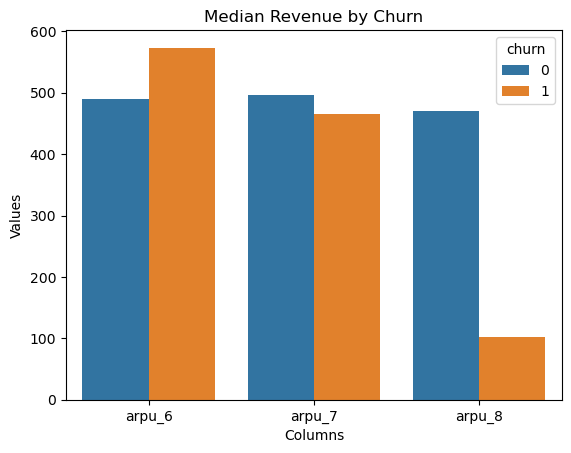

In [62]:
## Checking churn with change average revenue per use 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

arpu_data=base_data_high_val.groupby(['churn'])['arpu_6','arpu_7','arpu_8'].agg(np.median).reset_index()
arpu_data_melt = arpu_data.melt(id_vars='churn',value_vars=['arpu_6','arpu_7','arpu_8'], var_name='Columns', value_name='Values')

sns.barplot(x='Columns', y='Values',hue='churn', data=arpu_data_melt)
plt.title('Median Revenue by Churn')
plt.show()

## People having higher chance of churn can see a dip in ARPU which is significant enough from, we can now get derived 
## metrics to mark the slope by users
base_data_high_val['arpu_slope_7n6']=base_data_high_val['arpu_7']-base_data_high_val['arpu_6']
base_data_high_val['arpu_slope_8n7']=base_data_high_val['arpu_8']-base_data_high_val['arpu_7']
base_data_high_val['arpu_slope_tag']=np.where((base_data_high_val['arpu_slope_7n6']<=0)&
                                       (base_data_high_val['arpu_slope_8n7']<=0),-1,
                               np.where((base_data_high_val['arpu_slope_7n6']>0)&
                                       (base_data_high_val['arpu_slope_8n7']>0),1,0))


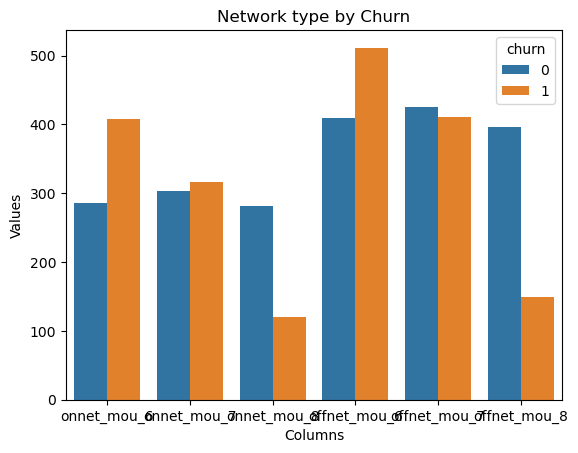

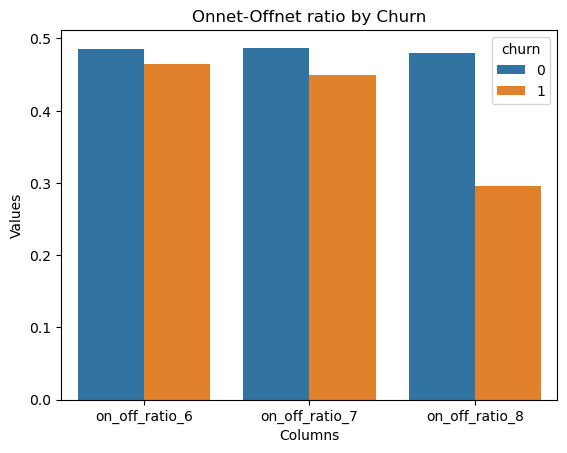

In [63]:
## Checking onnet vs offnet against the churn
## if user has higher offnet 
arpu_data=base_data_high_val.groupby(['churn'])['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8'].agg(np.mean).reset_index()
arpu_data_melt = arpu_data.melt(id_vars='churn',value_vars=['onnet_mou_6','onnet_mou_7','onnet_mou_8',
                                                           'offnet_mou_6','offnet_mou_7','offnet_mou_8'], var_name='Columns', value_name='Values')

sns.barplot(x='Columns', y='Values',hue='churn', data=arpu_data_melt)
plt.title('Network type by Churn')
plt.show()

# ## People having higher chance of churn by reduction in onnet as well as offnet
## let take the ratio of offnet by onnet if there is usage distirbution impacting it 
base_data_high_val['on_off_ratio_6']=np.where((base_data_high_val['onnet_mou_6']==0) | 
                                         (base_data_high_val['offnet_mou_6']==0),0,
                                          base_data_high_val['onnet_mou_6']/(base_data_high_val['onnet_mou_6']+base_data_high_val['onnet_mou_6']))

base_data_high_val['on_off_ratio_7']=np.where((base_data_high_val['onnet_mou_7']==0) | 
                                         (base_data_high_val['offnet_mou_7']==0),0,
                                          base_data_high_val['onnet_mou_7']/(base_data_high_val['onnet_mou_7']+base_data_high_val['onnet_mou_7']))

base_data_high_val['on_off_ratio_8']=np.where((base_data_high_val['onnet_mou_8']==0) | 
                                         (base_data_high_val['offnet_mou_8']==0),0,
                                          base_data_high_val['onnet_mou_8']/(base_data_high_val['onnet_mou_8']+base_data_high_val['onnet_mou_8']))


arpu_data=base_data_high_val.groupby(['churn'])['on_off_ratio_6','on_off_ratio_7','on_off_ratio_8'].agg(np.mean).reset_index()
arpu_data_melt = arpu_data.melt(id_vars='churn',value_vars=['on_off_ratio_6','on_off_ratio_7','on_off_ratio_8'],
                                var_name='Columns', value_name='Values')

sns.barplot(x='Columns', y='Values',hue='churn', data=arpu_data_melt)
plt.title('Onnet-Offnet ratio by Churn')
plt.show()


## However if we see from a onnet to offnet ratio, the ones churning are basically due to decrease in onnet usage
## so if the one reducing the local usage has higher chance to churn. People not churning has around 45/55 split of 
## onnet vs offnet usage

In [64]:
base_data_high_val.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,recharge_type_data_6_both,recharge_type_data_7_both,recharge_type_data_8_both,rech_month_active,rech_amt_7n6_slope,rech_amt_8n7_slope,rech_slope_tag,avg_rech_amt,average_rech_amt_6n7,arpu_slope_7n6,arpu_slope_8n7,arpu_slope_tag,on_off_ratio_6,on_off_ratio_7,on_off_ratio_8
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,5,5,7,1580,790,3638,1580,790,1580,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,3,-790,2848,0,2002.666667,1185.0,280.670,1821.630,1,0.5,0.5,0.5
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,19,21,14,437,601,120,90,154,30,1,1,1,0.0,2.0,3.0,0.0,177.0,69.0,0,0,0,3,164,-481,0,386.000000,519.0,113.502,-354.861,0,0.5,0.5,0.5
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00

In [65]:

base_data_high_val['onnet_offnet_slope'] = (base_data_high_val['on_off_ratio_8']-base_data_high_val['on_off_ratio_6']).add(base_data_high_val['on_off_ratio_7']).div(2)
base_data_high_val.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,recharge_type_data_6_both,recharge_type_data_7_both,recharge_type_data_8_both,rech_month_active,rech_amt_7n6_slope,rech_amt_8n7_slope,rech_slope_tag,avg_rech_amt,average_rech_amt_6n7,arpu_slope_7n6,arpu_slope_8n7,arpu_slope_tag,on_off_ratio_6,on_off_ratio_7,on_off_ratio_8,onnet_offnet_slope
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,5,5,7,1580,790,3638,1580,790,1580,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,3,-790,2848,0,2002.666667,1185.0,280.670,1821.630,1,0.5,0.5,0.5,0.25
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,19,21,14,437,601,120,90,154,30,1,1,1,0.0,2.0,3.0,0.0,177.0,69.0,0,0,0,3,164,-481,0,386.000000,519.0,113.502,-354.861,0,0.5,0.5,0.5,0.25
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,

Text(0.5, 1.0, 'Churn distribution by customer time')

<Figure size 1000x2000 with 0 Axes>

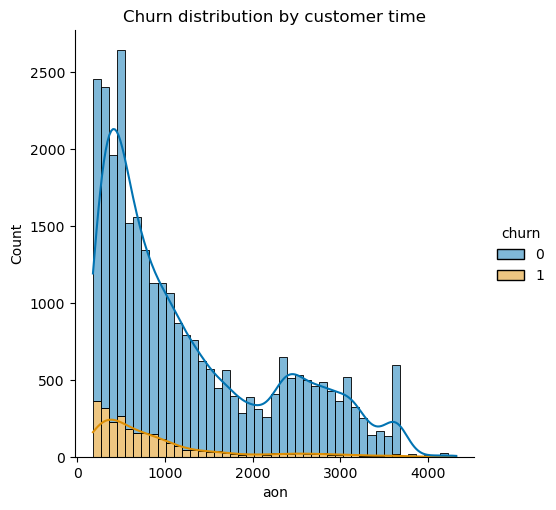

In [66]:
## Understand how we are getting impact by high revenue customer and low value customer segement 
## High valuable customers can be described by arpu and aon of the customer 
## We can create divide the customers by deciles to understand how much percentage of customers are getting 
## churned in which deciles 

## Deciling by network age time and ARPU 

## Understanding the time concept 
# Create a histogram with hue using displot
plt.figure(figsize=(10,20))
sns.displot(data=base_data_high_val, x='aon', hue='churn', kde=True, multiple='stack', palette='colorblind')
plt.title('Churn distribution by customer time')
## Both churn vs non churn customers have skewed distribution, but it can be seen that people spedning more than 
## 1000 days with the operator has lesser chance to churn as most of the churn is happening with the new customers



In [366]:
### 
base_data_high_val[base_data_high_val['arpu_6']<0]

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,recharge_type_data_6_both,recharge_type_data_7_both,recharge_type_data_8_both,rech_month_active,rech_amt_7n6_slope,rech_amt_8n7_slope,rech_slope_tag,avg_rech_amt,average_rech_amt_6n7,arpu_slope_7n6,arpu_slope_8n7,arpu_slope_tag,on_off_ratio_6,on_off_ratio_7,on_off_ratio_8,onnet_offnet_slope
821,7000238486,-160.795,165.590,384.850,0.86,23.98,3.34,604.14,120.31,348.74,6.11,8.61,4.61,0.00,39.31,0.00,0.00,0.00,0.00,7.81,11.86,1.39,0.00,0.00,0.00,0.00,0.00,0.00,7.81,11.86,1.39,0.86,23.33,3.34,596.33,69.78,347.34,0.00,0.00,0.00,597.19,93.11,350.69,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,605.01,104.98,352.09,0.00,3.28,2.48,11.58,10.55,10.96,0.00,0.00,0.00,11.58,13.83,13.44,2.51,0.55,16.50,211.08,1.76,48.33,0.00,0.00,0.00,213.59,2.31,64.83,225.18,16.14,78.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,464,0.00,0.00,0.00,0.0,0,6,4,3,2199,0,0,1000,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,3,-2199,0,-1,733.000000,1099.5,326.385,219.260,1,0.5,0.5,0.5,0.25
2746,7000037116,-88.306,626.231,363.066,2.08,68.29,87.53,3.60,152.96,130.63,0.00,74.63,0.00,0.00,20.39,0.00,2.08,49.63,75.19,0.90,81.44,60.41,0.00,7.25,12.66,0.00,0.00,0.00,2.98,138.33,148.28,0.00,6.28,12.33,0.00,16.19,8.58,0.00,29.61,48.96,0.00,52.09,69.88,0.00,0.00,7.16,2.70,14.58,0.00,0.0,0.0,0.0,5.68,205.01,225.33,19.39,14.84,22.11,13.91,27.66,53.06,0.00,1.93,0.43,33.31,44.44,75.61,0.00,0.00,1.81,0.00,41.98,36.74,0.00,3.98,33.74,0.00,45.96,72.31,33.31,209.48,219.58,0.00,0.21,0.00,0.00,118.84,71.64,0.00,0.00,0.00,0.0,45.38,0.00,0.0,384.20,0.00,0,0,0,0,2,0,0,0,0,0,2,0,239,316.73,159.61,0.00,0.0,0,2,5,2,550,604,130,550,250,130,1,1,1,0.0,4.0,0.0,0.0,708.0,0.0,0,1,0,3,54,-474,0,428.000000,577.0,714.537,-263.165,0,0.5,0.5,0.5,0.25
2777,7001528357,-2041.228,3972.710,-945.808,1501.31,2005.94,1722.39,4104.01,4619.03,5738.13,0.00,0.00,0.00,0.00,0.00,0.00,418.76,450.01,543.49,2653.43,3297.39,4524.59,17.59,0.43,5.74,5.64,0.00,9.76,3089.79,3747.84,5073.84,1082.54,1555.93,1178.89,1413.83,1317.66,1187.96,13.49,1.55,9.71,2509.88,2875.14,2376.58,0.00,0.00,0.00

In [68]:
## We can combine roaming as one , idea is if person uses either IC or OG roaming in any month then it has roaming
## active for that month, also the roaming minutes will directly impact the churn too, hypothesis is 
## if my network is benificial with roaming then high MOU customer will stick the network
all_columns=list(base_data_high_val.columns)

roam_cols=[col for col in all_columns if 'roam' in col]
print(roam_cols)

local_cols=[col for col in all_columns if 'loc' in col]
print(local_cols)

special_cols=[col for col in all_columns if 'spl' in col]
print(special_cols)

isd_cols=[col for col in all_columns if 'isd' in col]
print(isd_cols)

std_cols=[col for col in all_columns if 'std' in col]
print(std_cols)

other_cols=[col for col in all_columns if 'other' in col]
print(other_cols)



['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']
['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']
['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8']
['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8']
['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_

In [82]:
local_df=base_data_high_val[['mobile_number']+local_cols+['churn']]

## Checking with overall total local = t2t+t2m+t2f+t2c, this change in % in these behaviours can impact 
## how the churn eventually happens 

## Changing everything to percentage rather than the actual numbers 
for col in local_cols:
    if '6' in col:
        if 'loc_og' in col:
            local_df[col]=round(local_df[col]/local_df['loc_og_mou_6']*100)
        else:
            local_df[col]=round(local_df[col]/local_df['loc_ic_mou_6']*100)
    elif '7' in col:
        if 'loc_og' in col :
            local_df[col]=round(local_df[col]/local_df['loc_og_mou_7']*100)
        else:
            local_df[col]=round(local_df[col]/local_df['loc_ic_mou_7']*100)
    else:
        if 'loc_og' in col:
            local_df[col]=round(local_df[col]/local_df['loc_og_mou_8']*100)
        else:
            local_df[col]=round(local_df[col]/local_df['loc_ic_mou_8']*100)
        
        
            
local_df.fillna(0,inplace=True)
local_df.head()

,mobile_number,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,churn
7,7000701601,12.0,6.0,16.0,73.0,84.0,63.0,15.0,10.0,21.0,0.0,0.0,0.0,100.0,100.0,100.0,14.0,9.0,15.0,51.0,62.0,64.0,36.0,29.0,21.0,100.0,100.0,100.0,1
8,7001524846,79.0,76.0,20.0,21.0,24.0,80.0,0.0,0.0,0.0,0.0,0.0,11.0,100.0,100.0,100.0,29.0,41.0,2.0,71.0,59.0,98.0,0.0,0.0,0.0,100.0,100.0,100.0,0
13,7002191713,24.0,12.0,10.0,74.0,88.0,83.0,2.0,0.0,7.0,0.0,0.0,0.0,100.0,100.0,100.0,31.0,29.0,21.0,66.0,71.0,76.0,2.0,0.0,3.0,100.0,100.0,100.0,0
16,7000875565,13.0,30.0,33.0,87.0,68.0,62.0,0.0,2.0,5.0,0.0,0.0,0.0,100.0,100.0,100.0,15.0,31.0,14.0,82.0,65.0,71.0,3.0,4.0,15.0,100.0,100.0,100.0,0
17,7000187447,40.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,42.0,0.0,0.0,58.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0


In [85]:
local_df.drop(columns=['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8','loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'],inplace=True)

In [88]:
local_df.columns[1:-1]

Index(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'],
      dtype='object')

In [95]:
## How the churn changes with change in local usage behaviour
local_df_melt=local_df.melt(id_vars=['mobile_number','churn'],value_vars=list(local_df.columns[1:-1]),
                           var_name='Tag',value_name='Values')
local_df_melt['month']=local_df_melt['Tag'].apply(lambda x: x.split('_')[-1])
local_df_melt['ic_og']=local_df_melt['Tag'].apply(lambda x: x.split('_')[1])
local_df_melt['call_type']=local_df_melt['Tag'].apply(lambda x: x.split('_')[2])
local_df_melt.drop(columns='Tag',inplace=True)
local_df_melt.head()

,mobile_number,churn,Values,month,ic_og,call_type
0,7000701601,1,12.0,6,og,t2t
1,7001524846,0,79.0,6,og,t2t
2,7002191713,0,24.0,6,og,t2t
3,7000875565,0,13.0,6,og,t2t
4,7000187447,0,40.0,6,og,t2t


<AxesSubplot:xlabel='ic_og,month,call_type,churn'>

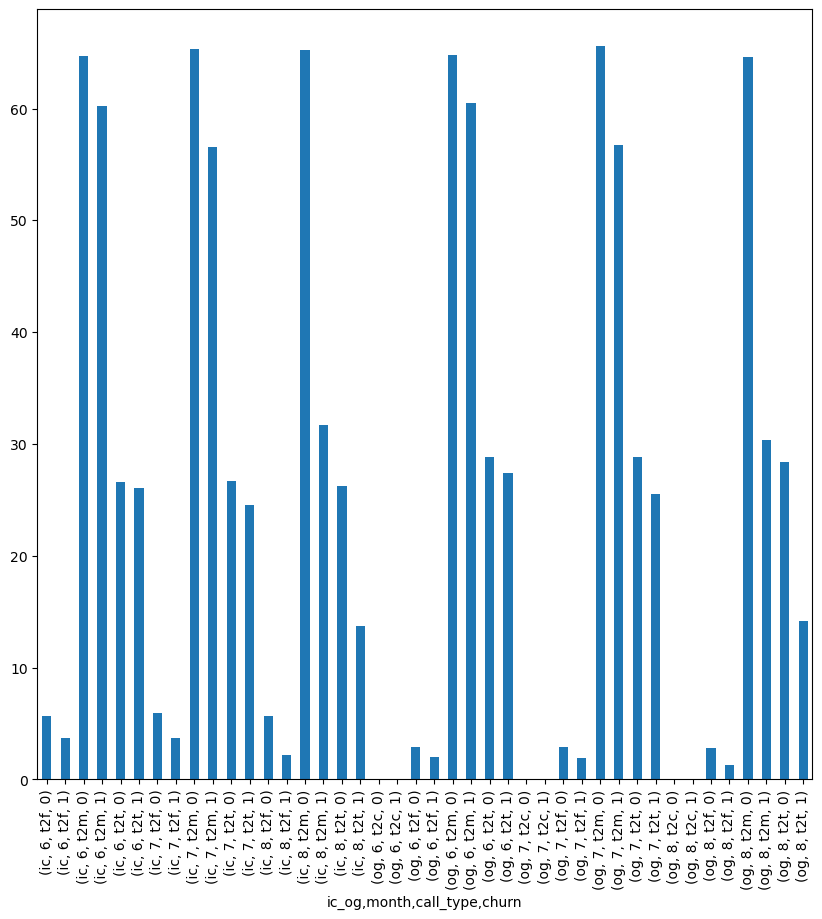

In [109]:
plt.figure(figsize=(10,10))
local_df_melt.groupby(['ic_og','month','call_type','churn'])['Values'].agg(np.mean).plot(kind='bar')


The ones churning have a significant reduction in t2m in the 8th month, meaning user signiicantly stopped calling to other operators using our network

In [86]:
arpu_data_melt = arpu_data.melt(id_vars='churn',value_vars=['on_off_ratio_6','on_off_ratio_7','on_off_ratio_8'],
                                var_name='Columns', value_name='Values')

,mobile_number,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,churn
7,7000701601,12.0,6.0,16.0,73.0,84.0,63.0,15.0,10.0,21.0,0.0,0.0,0.0,14.0,9.0,15.0,51.0,62.0,64.0,36.0,29.0,21.0,1
8,7001524846,79.0,76.0,20.0,21.0,24.0,80.0,0.0,0.0,0.0,0.0,0.0,11.0,29.0,41.0,2.0,71.0,59.0,98.0,0.0,0.0,0.0,0
13,7002191713,24.0,12.0,10.0,74.0,88.0,83.0,2.0,0.0,7.0,0.0,0.0,0.0,31.0,29.0,21.0,66.0,71.0,76.0,2.0,0.0,3.0,0
16,7000875565,13.0,30.0,33.0,87.0,68.0,62.0,0.0,2.0,5.0,0.0,0.0,0.0,15.0,31.0,14.0,82.0,65.0,71.0,3.0,4.0,15.0,0
17,7000187447,40.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,58.0,100.0,0.0,0.0,0.0,0.0,0


In [111]:
std_df=base_data_high_val[['mobile_number']+std_cols+['churn']]

## Checking with overall total std = t2t+t2m+t2f+t2c, this change in % in these behaviours can impact 
## how the churn eventually happens 

## Changing everything to percentage rather than the actual numbers 
for col in std_cols:
    if '6' in col:
        if 'std_og' in col:
            std_df[col]=round(std_df[col]/std_df['std_og_mou_6']*100)
        else:
            std_df[col]=round(std_df[col]/std_df['std_ic_mou_6']*100)
    elif '7' in col:
        if 'std_og' in col :
            std_df[col]=round(std_df[col]/std_df['std_og_mou_7']*100)
        else:
            std_df[col]=round(std_df[col]/std_df['std_ic_mou_7']*100)
    else:
        if 'std_og' in col:
            std_df[col]=round(std_df[col]/std_df['std_og_mou_8']*100)
        else:
            std_df[col]=round(std_df[col]/std_df['std_ic_mou_8']*100)
        
        
            
std_df.fillna(0,inplace=True)
std_df.head()

,mobile_number,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,churn
7,7000701601,7.0,31.0,15.0,82.0,42.0,63.0,11.0,27.0,21.0,100.0,100.0,100.0,20.0,7.0,16.0,51.0,73.0,73.0,29.0,20.0,11.0,100.0,100.0,100.0,1
8,7001524846,89.0,93.0,23.0,11.0,7.0,77.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,12.0,13.0,100.0,88.0,87.0,0.0,0.0,0.0,100.0,100.0,100.0,0
13,7002191713,64.0,62.0,76.0,36.0,38.0,24.0,0.0,0.0,0.0,100.0,100.0,100.0,27.0,56.0,33.0,73.0,44.0,67.0,0.0,0.0,0.0,100.0,100.0,100.0,0
16,7000875565,26.0,4.0,15.0,74.0,96.0,85.0,0.0,0.0,0.0,100.0,100.0,100.0,78.0,52.0,8.0,21.0,48.0,90.0,1.0,0.0,3.0,100.0,100.0,100.0,0
17,7000187447,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,87.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0


<AxesSubplot:xlabel='ic_og,month,call_type,churn'>

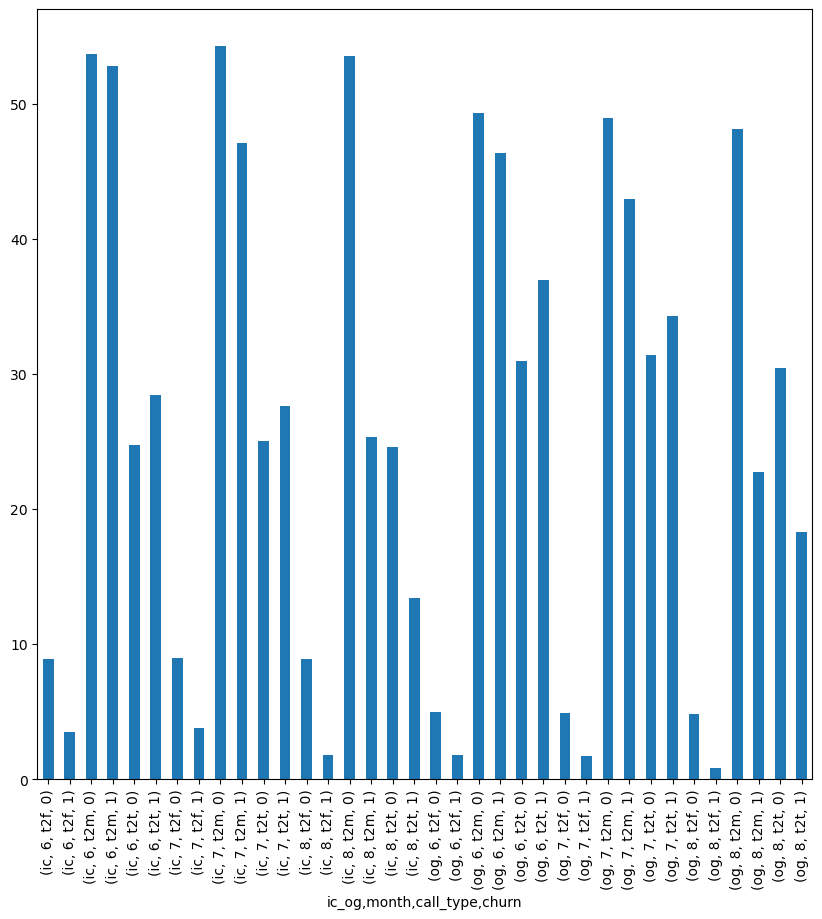

In [112]:
std_df.drop(columns=['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8','std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'],inplace=True)

std_df.columns[1:-1]

## How the churn changes with change in std usage behaviour
std_df_melt=std_df.melt(id_vars=['mobile_number','churn'],value_vars=list(std_df.columns[1:-1]),
                           var_name='Tag',value_name='Values')
std_df_melt['month']=std_df_melt['Tag'].apply(lambda x: x.split('_')[-1])
std_df_melt['ic_og']=std_df_melt['Tag'].apply(lambda x: x.split('_')[1])
std_df_melt['call_type']=std_df_melt['Tag'].apply(lambda x: x.split('_')[2])
std_df_melt.drop(columns='Tag',inplace=True)
std_df_melt.head()

plt.figure(figsize=(10,10))
std_df_melt.groupby(['ic_og','month','call_type','churn'])['Values'].agg(np.mean).plot(kind='bar')

## STD customers calling in the same network in the good phase are churning out more.


In [114]:
## Checking if roaming and std has high correlation, and we can remove roaming from it 
# Assuming you have a DataFrame called 'df'

roam_std_df=base_data_high_val[['mobile_number']+std_cols+roam_cols+['churn']]
correlated_columns = get_highly_correlated_columns(roam_std_df, threshold=0.7)
print(correlated_columns)

## roaming has no relation with STD, so we can check the impact of Roaming on the churn

             Column1           Column2  Correlation
0   std_og_t2t_mou_6  std_og_t2t_mou_7     0.721869
1   std_og_t2t_mou_6      std_og_mou_6     0.733871
2   std_og_t2t_mou_7  std_og_t2t_mou_8     0.795136
3   std_og_t2t_mou_7      std_og_mou_7     0.728798
4   std_og_t2t_mou_8      std_og_mou_8     0.740367
5   std_og_t2m_mou_6  std_og_t2m_mou_7     0.723616
6   std_og_t2m_mou_6      std_og_mou_6     0.740103
7   std_og_t2m_mou_7  std_og_t2m_mou_8     0.756910
8   std_og_t2m_mou_7      std_og_mou_7     0.743476
9   std_og_t2m_mou_8      std_og_mou_8     0.750508
10  std_og_t2f_mou_7  std_og_t2f_mou_8     0.762181
11      std_og_mou_6      std_og_mou_7     0.708742
12      std_og_mou_7      std_og_mou_8     0.779355
13  std_ic_t2t_mou_6  std_ic_t2t_mou_7     0.737919
14  std_ic_t2t_mou_7  std_ic_t2t_mou_8     0.705141
15  std_ic_t2m_mou_6      std_ic_mou_6     0.814865
16  std_ic_t2m_mou_7  std_ic_t2m_mou_8     0.709154
17  std_ic_t2m_mou_7      std_ic_mou_7     0.812812
18  std_ic_t

In [129]:
## Checking if roaming and std has 

roam_df=base_data_high_val[['mobile_number']+roam_cols+['churn']]

roam_df['roam_6_total']=roam_df['roam_ic_mou_6']+roam_df['roam_og_mou_6']
roam_df['roam_7_total']=roam_df['roam_ic_mou_7']+roam_df['roam_og_mou_7']
roam_df['roam_8_total']=roam_df['roam_ic_mou_8']+roam_df['roam_og_mou_8']
roam_df['roam_tag']=np.where((roam_df['roam_6_total']==0) & (roam_df['roam_7_total']==0)& (roam_df['roam_8_total']==0),
                            'No Roaming',np.where((roam_df['roam_6_total']>0) | (roam_df['roam_7_total']>0) &
                                                 (roam_df['roam_8_total']==0),'Good Phase Roaming',
                            np.where((roam_df['roam_6_total']==0) & (roam_df['roam_7_total']==0)& (roam_df['roam_8_total']>0),
                                    'Action Phase Roaming', 'All Time Roaming')) )

print('Roaming Active all time')
print(roam_df[roam_df['roam_tag']=='All Time Roaming']['churn'].value_counts()/len(roam_df[roam_df['roam_tag']=='All Time Roaming']))

print('Roaming not active')
print(roam_df[roam_df['roam_tag']=='No Roaming']['churn'].value_counts()/len(roam_df[roam_df['roam_tag']=='No Roaming']))

print('Only Good Phase active')
print(roam_df[roam_df['roam_tag']=='Good Phase Roaming']['churn'].value_counts()/len(roam_df[roam_df['roam_tag']=='Good Phase Roaming']))

print('Only Action Phase Active active')
print(roam_df[roam_df['roam_tag']=='Action Phase Roaming']['churn'].value_counts()/len(roam_df[roam_df['roam_tag']=='Action Phase Roaming']))



## users actively using roaming , even for once in a 3 month time has higher chance to churn against people
## who never used roaming in these 3 months, All time active roamers along with action phase roamers, ~25% of those
## users are leaving the operator, so somewhere roaming plans are not as lucrative as can be seen



Roaming Active all time
0    0.75995
1    0.24005
Name: churn, dtype: float64
Roaming not active
0    0.9539
1    0.0461
Name: churn, dtype: float64
Only Good Phase active
0    0.891629
1    0.108371
Name: churn, dtype: float64
Only Action Phase Active active
0    0.763117
1    0.236883
Name: churn, dtype: float64


In [132]:
## No checking plans of special uses and its impact on the churn value 
special_df=base_data_high_val[['mobile_number']+special_cols+['churn']]

special_df['special_6_total']=special_df['spl_ic_mou_6']+special_df['spl_og_mou_6']
special_df['special_7_total']=special_df['spl_ic_mou_7']+special_df['spl_og_mou_7']
special_df['special_8_total']=special_df['spl_ic_mou_8']+special_df['spl_og_mou_8']
special_df['special_tag']=np.where((special_df['special_6_total']==0) & (special_df['special_7_total']==0)& (special_df['special_8_total']==0),
                            'No Special Use',np.where((special_df['special_6_total']>0) | (special_df['special_7_total']>0) &
                                                 (special_df['special_8_total']==0),'Good Phase Special Use',
                            np.where((special_df['special_6_total']==0) & (special_df['special_7_total']==0)& (special_df['special_8_total']>0),
                                    'Action Phase Special Use', 'All Time Special Use')) )

print('Special Use Active all time')
print(special_df[special_df['special_tag']=='All Time Special Use']['churn'].value_counts()/len(special_df[special_df['special_tag']=='All Time Special Use']))

print('Special Use not active')
print(special_df[special_df['special_tag']=='No Special Use']['churn'].value_counts()/len(special_df[special_df['special_tag']=='No Special Use']))

print('Only Good Phase active')
print(special_df[special_df['special_tag']=='Good Phase Special Use']['churn'].value_counts()/len(special_df[special_df['special_tag']=='Good Phase Special Use']))

print('Only Action Phase Active')
print(special_df[special_df['special_tag']=='Action Phase Special Use']['churn'].value_counts()/len(special_df[special_df['special_tag']=='Action Phase Special Use']))

## Special usage has better chance of not churning though, especially in the action phase against the ones who
## never used a special pack, we we can see the customer not using a special pack, we can recommend that 
## in their action phase to reduce the churn from 12% to 2% from these figures

Special Use Active all time
0    0.956837
1    0.043163
Name: churn, dtype: float64
Special Use not active
0    0.878162
1    0.121838
Name: churn, dtype: float64
Only Good Phase active
0    0.911258
1    0.088742
Name: churn, dtype: float64
Only Action Phase Active
0    0.970545
1    0.029455
Name: churn, dtype: float64


In [133]:
## checking plans of isd uses and its impact on the churn value 
isd_df=base_data_high_val[['mobile_number']+isd_cols+['churn']]

isd_df['isd_6_total']=isd_df['isd_ic_mou_6']+isd_df['isd_og_mou_6']
isd_df['isd_7_total']=isd_df['isd_ic_mou_7']+isd_df['isd_og_mou_7']
isd_df['isd_8_total']=isd_df['isd_ic_mou_8']+isd_df['isd_og_mou_8']
isd_df['isd_tag']=np.where((isd_df['isd_6_total']==0) & (isd_df['isd_7_total']==0)& (isd_df['isd_8_total']==0),
                            'No isd Use',np.where((isd_df['isd_6_total']>0) | (isd_df['isd_7_total']>0) &
                                                 (isd_df['isd_8_total']==0),'Good Phase isd Use',
                            np.where((isd_df['isd_6_total']==0) & (isd_df['isd_7_total']==0)& (isd_df['isd_8_total']>0),
                                    'Action Phase isd Use', 'All Time isd Use')) )

print('isd Use Active all time')
print(isd_df[isd_df['isd_tag']=='All Time isd Use']['churn'].value_counts()/len(isd_df[isd_df['isd_tag']=='All Time isd Use']))

print('isd Use not active')
print(isd_df[isd_df['isd_tag']=='No isd Use']['churn'].value_counts()/len(isd_df[isd_df['isd_tag']=='No isd Use']))

print('Only Good Phase active')
print(isd_df[isd_df['isd_tag']=='Good Phase isd Use']['churn'].value_counts()/len(isd_df[isd_df['isd_tag']=='Good Phase isd Use']))

print('Only Action Phase Active')
print(isd_df[isd_df['isd_tag']=='Action Phase isd Use']['churn'].value_counts()/len(isd_df[isd_df['isd_tag']=='Action Phase isd Use']))


## ISD usage does not significant change in Usage vs Non-usage, so it is not directly changing the churn rate, 
## but still action phase has improve the churn as compared to no-usage at all

isd Use Active all time
0    0.947754
1    0.052246
Name: churn, dtype: float64
isd Use not active
0    0.905634
1    0.094366
Name: churn, dtype: float64
Only Good Phase active
0    0.915108
1    0.084892
Name: churn, dtype: float64
Only Action Phase Active
0    0.968523
1    0.031477
Name: churn, dtype: float64


In [137]:

other_df=base_data_high_val[['mobile_number']+other_cols+['churn']]

other_df['other_6_total']=other_df['ic_others_6']+other_df['og_others_6']
other_df['other_7_total']=other_df['ic_others_7']+other_df['og_others_7']
other_df['other_8_total']=other_df['ic_others_8']+other_df['og_others_8']
other_df['other_tag']=np.where((other_df['other_6_total']==0) & (other_df['other_7_total']==0)& (other_df['other_8_total']==0),
                            'No other Use',np.where((other_df['other_6_total']>0) | (other_df['other_7_total']>0) &
                                                 (other_df['other_8_total']==0),'Good Phase other Use',
                            np.where((other_df['other_6_total']==0) & (other_df['other_7_total']==0)& (other_df['other_8_total']>0),
                                    'Action Phase other Use', 'All Time other Use')) )

print('other Use Active all time')
print(other_df[other_df['other_tag']=='All Time other Use']['churn'].value_counts()/len(other_df[other_df['other_tag']=='All Time other Use']))

print('other Use not active')
print(other_df[other_df['other_tag']=='No other Use']['churn'].value_counts()/len(other_df[other_df['other_tag']=='No other Use']))

print('Only Good Phase active')
print(other_df[other_df['other_tag']=='Good Phase other Use']['churn'].value_counts()/len(other_df[other_df['other_tag']=='Good Phase other Use']))

print('Only Action Phase Active')
print(other_df[other_df['other_tag']=='Action Phase other Use']['churn'].value_counts()/len(other_df[other_df['other_tag']=='Action Phase other Use']))


## one interesting to watch here is others and isd service numbers are almost similar , probably they are closely 
## related and ISD might be a part of other services provided, we can check the correlation between them and remove
## if needed

other Use Active all time
0    0.970854
1    0.029146
Name: churn, dtype: float64
other Use not active
0    0.903735
1    0.096265
Name: churn, dtype: float64
Only Good Phase active
0    0.912746
1    0.087254
Name: churn, dtype: float64
Only Action Phase Active
0    0.963443
1    0.036557
Name: churn, dtype: float64


In [149]:
## correlation between ISD and other services 
others_isd_df=pd.merge(isd_df,other_df,on=['mobile_number','churn'],how='inner')
correlated_columns = get_highly_correlated_columns(others_isd_df, threshold=0.7)
print(correlated_columns)

## ISD is not a related to other services, but still it has a similar impact on the set of users which either used 
## ISD or others 
print('    ')
print('other  & ISD Use Active all time')
print(others_isd_df[(others_isd_df['other_tag']=='All Time other Use') & 
                   (others_isd_df['isd_tag']=='All Time isd Use')]['churn'].value_counts())

## There are only 72 users which have used ISD and other services together, and around 5% of them only churned
## which is small number as compared to other 

          Column1        Column2  Correlation
0    isd_og_mou_6   isd_og_mou_7     0.914963
1    isd_og_mou_6   isd_og_mou_8     0.916058
2    isd_og_mou_7   isd_og_mou_8     0.941347
3    isd_ic_mou_6   isd_ic_mou_7     0.734946
4    isd_ic_mou_6    isd_6_total     0.847557
5    isd_ic_mou_7   isd_ic_mou_8     0.733963
6    isd_ic_mou_7    isd_7_total     0.873036
7    isd_ic_mou_8    isd_8_total     0.870119
8     isd_6_total    isd_7_total     0.783485
9     isd_6_total    isd_8_total     0.702957
10    isd_7_total    isd_8_total     0.792658
11    ic_others_6  other_6_total     0.986981
12    ic_others_7    ic_others_8     0.701005
13    ic_others_7  other_7_total     0.984598
14    ic_others_8  other_8_total     0.969359
15  other_7_total  other_8_total     0.701543
    
other  & ISD Use Active all time
0    72
1     4
Name: churn, dtype: int64


In [150]:
## Checking the impact of data pack usage and its impact on the churn rates
base_data_high_val.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,recharge_type_data_6_both,recharge_type_data_7_both,recharge_type_data_8_both,rech_month_active,rech_amt_7n6_slope,rech_amt_8n7_slope,rech_slope_tag,avg_rech_amt,average_rech_amt_6n7,arpu_slope_7n6,arpu_slope_8n7,arpu_slope_tag,on_off_ratio_6,on_off_ratio_7,on_off_ratio_8,onnet_offnet_slope
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,5,5,7,1580,790,3638,1580,790,1580,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,3,-790,2848,0,2002.666667,1185.0,280.670,1821.630,1,0.5,0.5,0.5,0.25
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,19,21,14,437,601,120,90,154,30,1,1,1,0.0,2.0,3.0,0.0,177.0,69.0,0,0,0,3,164,-481,0,386.000000,519.0,113.502,-354.861,0,0.5,0.5,0.5,0.25
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,

In [156]:
data_2g_cols=[col for col in all_columns if '2g' in col]
data_3g_cols=[col for col in all_columns if '3g' in col]
data_cols=data_2g_cols+data_3g_cols
data_cols=data_cols[:-1]

In [157]:
## first we have to understand if people use 2g and 3g together 
data_usage_df=base_data_high_val[['mobile_number']+data_cols+['churn']]
data_usage_df.head()

,mobile_number,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601,0.0,0.0,0.00,0,0,0,0,0,0,0.0,0.00,0.00,0,0,0,0,0,0,57.74,19.38,18.74,1
8,7001524846,0.0,356.0,0.03,0,1,0,0,1,3,0.0,750.95,11.94,0,0,0,0,0,0,21.03,910.65,122.16,0
13,7002191713,0.0,0.0,0.02,0,0,0,0,0,3,0.0,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,0
16,7000875565,0.0,0.0,0.00,0,0,0,0,0,0,0.0,0.00,0.00,0,0,0,0,0,0,0.00,2.45,21.89,0
17,7000187447,0.0,0.0,0.00,0,0,0,0,0,0,0.0,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,0


In [163]:
# Usage 
data_usage_df['delta_vol_2g'] = data_usage_df['vol_2g_mb_8'] - data_usage_df['vol_2g_mb_6'].add(data_usage_df['vol_2g_mb_7']).div(2)
data_usage_df['delta_vol_3g'] = data_usage_df['vol_3g_mb_8'] - data_usage_df['vol_3g_mb_6'].add(data_usage_df['vol_3g_mb_7']).div(2)

In [184]:
## check the change in data usage by churn 
data_usage_df['data_tag']=np.where((data_usage_df['delta_vol_2g']<0)&(data_usage_df['delta_vol_3g']>0),
                                  '3g_transition',
                           np.where((data_usage_df['delta_vol_2g']>0)&(data_usage_df['delta_vol_3g']<0),
                                   '2g_transition',
                           np.where((data_usage_df['delta_vol_2g']==0)&(data_usage_df['delta_vol_3g']>0),
                                   '3g_user_positive',
                           np.where((data_usage_df['delta_vol_2g']>0)&(data_usage_df['delta_vol_3g']==0),
                                    '2g_user_positive',
                           np.where((data_usage_df['delta_vol_2g']>0)&(data_usage_df['delta_vol_3g']>0),
                                    'data_lover',
                           np.where(((data_usage_df['delta_vol_2g']<0) & (data_usage_df['delta_vol_3g']==0)) |
                                    ((data_usage_df['delta_vol_2g']==0) & (data_usage_df['delta_vol_3g']<0)),
                                    'data_use_reducer','data_non_lover'
                                   ))))))

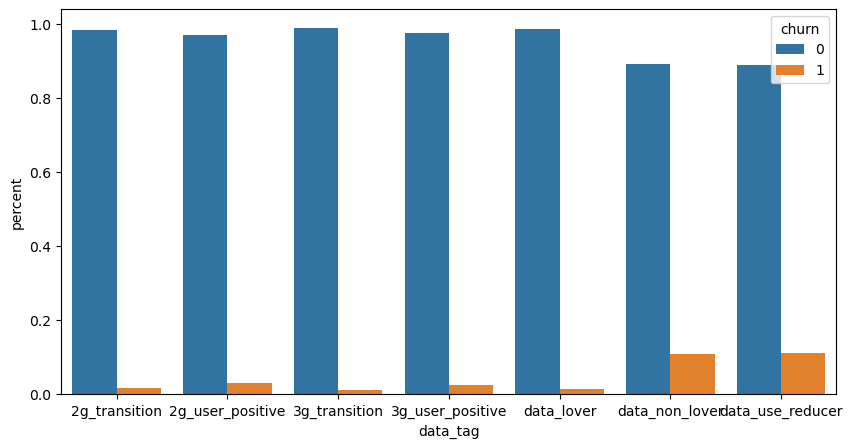

In [185]:
data_usage_grouped=data_usage_df.groupby(['data_tag','churn'])['mobile_number'].count().reset_index()
data_usage_grouped['total']=data_usage_grouped.groupby(['data_tag'])['mobile_number'].transform(np.sum)
data_usage_grouped['percent']=data_usage_grouped['mobile_number']/data_usage_grouped['total']
plt.figure(figsize=(10,5))
sns.barplot(x='data_tag',y='percent',data=data_usage_grouped,hue='churn')
plt.show()

## People who do love using data, are not moving out , ones who have not used the data at all are churning

In [188]:
### Sachet  vs sachet VS vbc usage of data 
data_usage_df['vbc_delta']=data_usage_df['aug_vbc_3g'] - data_usage_df['jun_vbc_3g'].add(data_usage_df['jul_vbc_3g']).div(2)
data_usage_df['sachet_delta_2g']=data_usage_df['sachet_2g_8'] - data_usage_df['sachet_2g_6'].add(data_usage_df['sachet_2g_7']).div(2)
data_usage_df['sachet_delta_3g']=data_usage_df['sachet_3g_8'] - data_usage_df['sachet_3g_8'].add(data_usage_df['sachet_3g_8']).div(2)

data_usage_df['sachet_delta_2g']=data_usage_df['sachet_2g_8'] - data_usage_df['sachet_2g_6'].add(data_usage_df['sachet_2g_7']).div(2)
data_usage_df['sachet_delta_3g']=data_usage_df['sachet_3g_8'] - data_usage_df['sachet_3g_8'].add(data_usage_df['sachet_3g_8']).div(2)



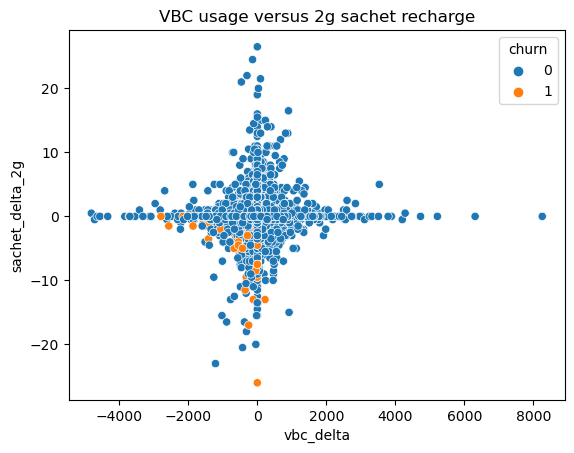

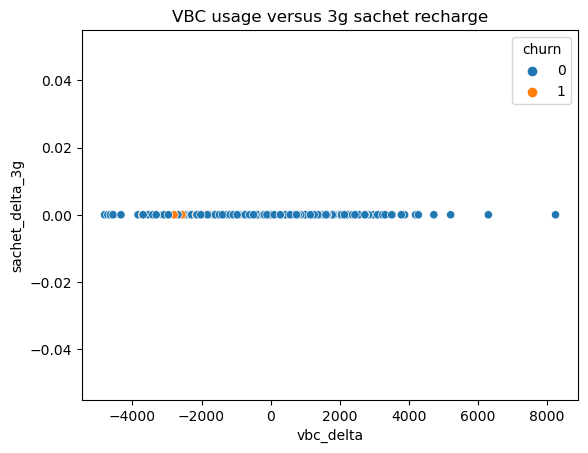

In [192]:
sns.scatterplot(data=data_usage_df,x='vbc_delta',y='sachet_delta_2g',hue='churn')
plt.title('VBC usage versus 2g sachet recharge')
plt.show()
## Churn and reduction in data usage of 2g sachets and VBC are related

sns.scatterplot(data=data_usage_df,x='vbc_delta',y='sachet_delta_3g',hue='churn')
plt.title('VBC usage versus 3g sachet recharge')
plt.show()
## If a person with no change in 3g sachets but only dependent on VBC has impact on churn, 3g has no significance 
## in the non-churning 


In [200]:
## making the final analytical data with the derived columns 
local_df.columns=[col+'_perc' if col not in ['mobile_number','churn'] else col for col in list(local_df.columns)]
local_df.head()

,mobile_number,loc_og_t2t_mou_6_perc,loc_og_t2t_mou_7_perc,loc_og_t2t_mou_8_perc,loc_og_t2m_mou_6_perc,loc_og_t2m_mou_7_perc,loc_og_t2m_mou_8_perc,loc_og_t2f_mou_6_perc,loc_og_t2f_mou_7_perc,loc_og_t2f_mou_8_perc,loc_og_t2c_mou_6_perc,loc_og_t2c_mou_7_perc,loc_og_t2c_mou_8_perc,loc_ic_t2t_mou_6_perc,loc_ic_t2t_mou_7_perc,loc_ic_t2t_mou_8_perc,loc_ic_t2m_mou_6_perc,loc_ic_t2m_mou_7_perc,loc_ic_t2m_mou_8_perc,loc_ic_t2f_mou_6_perc,loc_ic_t2f_mou_7_perc,loc_ic_t2f_mou_8_perc,churn
7,7000701601,12.0,6.0,16.0,73.0,84.0,63.0,15.0,10.0,21.0,0.0,0.0,0.0,14.0,9.0,15.0,51.0,62.0,64.0,36.0,29.0,21.0,1
8,7001524846,79.0,76.0,20.0,21.0,24.0,80.0,0.0,0.0,0.0,0.0,0.0,11.0,29.0,41.0,2.0,71.0,59.0,98.0,0.0,0.0,0.0,0
13,7002191713,24.0,12.0,10.0,74.0,88.0,83.0,2.0,0.0,7.0,0.0,0.0,0.0,31.0,29.0,21.0,66.0,71.0,76.0,2.0,0.0,3.0,0
16,7000875565,13.0,30.0,33.0,87.0,68.0,62.0,0.0,2.0,5.0,0.0,0.0,0.0,15.0,31.0,14.0,82.0,65.0,71.0,3.0,4.0,15.0,0
17,7000187447,40.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,58.0,100.0,0.0,0.0,0.0,0.0,0


In [202]:
### std df
std_df.columns=[col+'_perc' if col not in ['mobile_number','churn'] else col for col in list(std_df.columns)]
std_df.head()

,mobile_number,std_og_t2t_mou_6_perc,std_og_t2t_mou_7_perc,std_og_t2t_mou_8_perc,std_og_t2m_mou_6_perc,std_og_t2m_mou_7_perc,std_og_t2m_mou_8_perc,std_og_t2f_mou_6_perc,std_og_t2f_mou_7_perc,std_og_t2f_mou_8_perc,std_ic_t2t_mou_6_perc,std_ic_t2t_mou_7_perc,std_ic_t2t_mou_8_perc,std_ic_t2m_mou_6_perc,std_ic_t2m_mou_7_perc,std_ic_t2m_mou_8_perc,std_ic_t2f_mou_6_perc,std_ic_t2f_mou_7_perc,std_ic_t2f_mou_8_perc,churn
7,7000701601,7.0,31.0,15.0,82.0,42.0,63.0,11.0,27.0,21.0,20.0,7.0,16.0,51.0,73.0,73.0,29.0,20.0,11.0,1
8,7001524846,89.0,93.0,23.0,11.0,7.0,77.0,0.0,0.0,0.0,0.0,12.0,13.0,100.0,88.0,87.0,0.0,0.0,0.0,0
13,7002191713,64.0,62.0,76.0,36.0,38.0,24.0,0.0,0.0,0.0,27.0,56.0,33.0,73.0,44.0,67.0,0.0,0.0,0.0,0
16,7000875565,26.0,4.0,15.0,74.0,96.0,85.0,0.0,0.0,0.0,78.0,52.0,8.0,21.0,48.0,90.0,1.0,0.0,3.0,0
17,7000187447,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0


In [217]:
local_df.drop(columns='churn',inplace=True)

In [218]:
std_df.drop(columns='churn',inplace=True)

In [205]:
roam_df=roam_df[['mobile_number','roam_6_total', 'roam_7_total', 'roam_8_total', 'roam_tag']]

In [207]:
isd_df=isd_df[['mobile_number','isd_6_total', 'isd_7_total', 'isd_8_total', 'isd_tag']]

In [211]:
other_df=other_df[['mobile_number','other_6_total', 'other_7_total', 'other_8_total', 'other_tag']]

In [210]:
special_df=special_df[['mobile_number','special_6_total', 'special_7_total', 'special_8_total', 'special_tag']]

In [214]:
data_usage_df=data_usage_df[['mobile_number','delta_vol_2g', 'delta_vol_3g', 'data_tag',
       'vbc_delta', 'sachet_delta_2g', 'sachet_delta_3g']]

In [270]:
from functools import reduce

# Assuming you have multiple DataFrames called df1, df2, df3, etc. that you want to merge

# List of DataFrames to merge
dfs_to_merge = [base_data_high_val, local_df, std_df,roam_df,isd_df,other_df,special_df,data_usage_df]

# Merge the DataFrames using reduce() and merge()
merged_df = reduce(lambda left, right: pd.merge(left, right, on='mobile_number'), dfs_to_merge)

# Display the merged DataFrame
merged_df.head()


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,recharge_type_data_6_both,recharge_type_data_7_both,recharge_type_data_8_both,rech_month_active,rech_amt_7n6_slope,rech_amt_8n7_slope,rech_slope_tag,avg_rech_amt,average_rech_amt_6n7,arpu_slope_7n6,arpu_slope_8n7,arpu_slope_tag,on_off_ratio_6,on_off_ratio_7,on_off_ratio_8,onnet_offnet_slope,loc_og_t2t_mou_6_perc,loc_og_t2t_mou_7_perc,loc_og_t2t_mou_8_perc,loc_og_t2m_mou_6_perc,loc_og_t2m_mou_7_perc,loc_og_t2m_mou_8_perc,loc_og_t2f_mou_6_perc,loc_og_t2f_mou_7_perc,loc_og_t2f_mou_8_perc,loc_og_t2c_mou_6_perc,loc_og_t2c_mou_7_perc,loc_og_t2c_mou_8_perc,loc_ic_t2t_mou_6_perc,loc_ic_t2t_mou_7_perc,loc_ic_t2t_mou_8_perc,loc_ic_t2m_mou_6_perc,loc_ic_t2m_mou_7_perc,loc_ic_t2m_mou_8_perc,loc_ic_t2f_mou_6_perc,loc_ic_t2f_mou_7_perc,loc_ic_t2f_mou_8_perc,std_og_t2t_mou_6_perc,std_og_t2t_mou_7_perc,std_og_t2t_mou_8_perc,std_og_t2m_mou_6_perc,std_og_t2m_mou_7_perc,std_og_t2m_mou_8_perc,std_og_t2f_mou_6_perc,std_og_t2f_mou_7_perc,std_og_t2f_mou_8_perc,std_ic_t2t_mou_6_perc,std_ic_t2t_mou_7_perc,std_ic_t2t_mou_8_perc,std_ic_t2m_mou_6_perc,std_ic_t2m_mou_7_perc,std_ic_t2m_mou_8_perc,std_ic_t2f_mou_6_perc,std_ic_t2f_mou_7_perc,std_ic_t2f_mou_8_perc,roam_6_total,roam_7_total,roam_8_total,roam_tag,isd_6_total,isd_7_total,isd_8_total,isd_tag,other_6_total,other_7_total,other_8_total,other_tag,special_6_total,special_7_total,special_8_total,special_tag,delta_vol_2g,delta_vol_3g,data_tag,vbc_delta,sachet_delta_2g,sachet_delta_3g
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,

In [271]:
merged_df.drop(columns='sep_vbc_3g',inplace=True)

In [272]:
merged_df.shape

(30011, 209)

In [273]:
merged_df.dtypes

mobile_number                  int64
arpu_6                       float64
arpu_7                       float64
arpu_8                       float64
onnet_mou_6                  float64
onnet_mou_7                  float64
onnet_mou_8                  float64
offnet_mou_6                 float64
offnet_mou_7                 float64
offnet_mou_8                 float64
roam_ic_mou_6                float64
roam_ic_mou_7                float64
roam_ic_mou_8                float64
roam_og_mou_6                float64
roam_og_mou_7                float64
roam_og_mou_8                float64
loc_og_t2t_mou_6             float64
loc_og_t2t_mou_7             float64
loc_og_t2t_mou_8             float64
loc_og_t2m_mou_6             float64
loc_og_t2m_mou_7             float64
loc_og_t2m_mou_8             float64
loc_og_t2f_mou_6             float64
loc_og_t2f_mou_7             float64
loc_og_t2f_mou_8             float64
loc_og_t2c_mou_6             float64
loc_og_t2c_mou_7             float64
l

In [274]:
# Select columns with object data type
object_columns = merged_df.select_dtypes(include='object')
object_columns=object_columns.columns
object_columns

Index(['roam_tag', 'isd_tag', 'other_tag', 'special_tag', 'data_tag'], dtype='object')

In [275]:
## Create Dummy variables out of it 
dummy_vars = pd.get_dummies(merged_df[object_columns], drop_first=True, prefix=object_columns, prefix_sep='_')
dummy_vars.head()

,roam_tag_All Time Roaming,roam_tag_Good Phase Roaming,roam_tag_No Roaming,isd_tag_All Time isd Use,isd_tag_Good Phase isd Use,isd_tag_No isd Use,other_tag_All Time other Use,other_tag_Good Phase other Use,other_tag_No other Use,special_tag_All Time Special Use,special_tag_Good Phase Special Use,special_tag_No Special Use,data_tag_2g_user_positive,data_tag_3g_transition,data_tag_3g_user_positive,data_tag_data_lover,data_tag_data_non_lover,data_tag_data_use_reducer
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [276]:
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list() # Using category 'Others' in each column as reference. 
dummy_vars.drop(columns=reference_cols, inplace=True)
reference_cols

[]

In [277]:
# concatenating dummy variables with original 'data'
merged_df.drop(columns=object_columns, inplace=True) # dropping original categorical columns
merged_df = pd.concat([merged_df, dummy_vars], axis=1)
merged_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,recharge_type_data_6_both,recharge_type_data_7_both,recharge_type_data_8_both,rech_month_active,rech_amt_7n6_slope,rech_amt_8n7_slope,rech_slope_tag,avg_rech_amt,average_rech_amt_6n7,arpu_slope_7n6,arpu_slope_8n7,arpu_slope_tag,on_off_ratio_6,on_off_ratio_7,on_off_ratio_8,onnet_offnet_slope,loc_og_t2t_mou_6_perc,loc_og_t2t_mou_7_perc,loc_og_t2t_mou_8_perc,loc_og_t2m_mou_6_perc,loc_og_t2m_mou_7_perc,loc_og_t2m_mou_8_perc,loc_og_t2f_mou_6_perc,loc_og_t2f_mou_7_perc,loc_og_t2f_mou_8_perc,loc_og_t2c_mou_6_perc,loc_og_t2c_mou_7_perc,loc_og_t2c_mou_8_perc,loc_ic_t2t_mou_6_perc,loc_ic_t2t_mou_7_perc,loc_ic_t2t_mou_8_perc,loc_ic_t2m_mou_6_perc,loc_ic_t2m_mou_7_perc,loc_ic_t2m_mou_8_perc,loc_ic_t2f_mou_6_perc,loc_ic_t2f_mou_7_perc,loc_ic_t2f_mou_8_perc,std_og_t2t_mou_6_perc,std_og_t2t_mou_7_perc,std_og_t2t_mou_8_perc,std_og_t2m_mou_6_perc,std_og_t2m_mou_7_perc,std_og_t2m_mou_8_perc,std_og_t2f_mou_6_perc,std_og_t2f_mou_7_perc,std_og_t2f_mou_8_perc,std_ic_t2t_mou_6_perc,std_ic_t2t_mou_7_perc,std_ic_t2t_mou_8_perc,std_ic_t2m_mou_6_perc,std_ic_t2m_mou_7_perc,std_ic_t2m_mou_8_perc,std_ic_t2f_mou_6_perc,std_ic_t2f_mou_7_perc,std_ic_t2f_mou_8_perc,roam_6_total,roam_7_total,roam_8_total,isd_6_total,isd_7_total,isd_8_total,other_6_total,other_7_total,other_8_total,special_6_total,special_7_total,special_8_total,delta_vol_2g,delta_vol_3g,vbc_delta,sachet_delta_2g,sachet_delta_3g,roam_tag_All Time Roaming,roam_tag_Good Phase Roaming,roam_tag_No Roaming,isd_tag_All Time isd Use,isd_tag_Good Phase isd Use,isd_tag_No isd Use,other_tag_All Time other Use,other_tag_Good Phase other Use,other_tag_No other Use,special_tag_All Time Special Use,special_tag_Good Phase Special Use,special_tag_No Special Use,data_tag_2g_user_positive,data_tag_3g_transition,data_tag_3g_user_positive,data_tag_data_lover,data_tag_data_non_lover,data_tag_data_use_reducer
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76

### This following section contains

Test Train Split
Class Imbalance
Standardization
- Modelling
  - Model 1 : Logistic Regression with RFE & Manual Elimination ( Interpretable Model )
  - Model 2 : PCA + Logistic Regression
  - Model 3 : PCA + Random Forest Classifier
  

In [278]:
merged_df.drop(columns=['mobile_number'],inplace=True)
# Replace inf with 0
merged_df = merged_df.replace([np.inf, -np.inf], 0)

In [279]:
# Looking at quantiles from 0.90 to 1. 
merged_df.quantile(np.arange(0.9,1.01,0.01)).style.bar()


In [280]:
merged_df.shape

(30011, 221)

In [281]:
## Train-Test Split
y = merged_df.pop('churn') # Predicted / Target Variable
X = merged_df # Predictor variables

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [283]:
y.value_counts(normalize=True).to_frame()

,churn
0,0.913598
1,0.086402


In [284]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

## We can use use SMOTE to make these imbalanced classes balanced

Class Imbalance Ratio : 0.095


In [285]:
#!pip install imblearn --trusted-host pypi.org --trusted-host files.pythonhosted.org

In [286]:


from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,recharge_type_data_6_both,recharge_type_data_7_both,recharge_type_data_8_both,rech_month_active,rech_amt_7n6_slope,rech_amt_8n7_slope,rech_slope_tag,avg_rech_amt,average_rech_amt_6n7,arpu_slope_7n6,arpu_slope_8n7,arpu_slope_tag,on_off_ratio_6,on_off_ratio_7,on_off_ratio_8,onnet_offnet_slope,loc_og_t2t_mou_6_perc,loc_og_t2t_mou_7_perc,loc_og_t2t_mou_8_perc,loc_og_t2m_mou_6_perc,loc_og_t2m_mou_7_perc,loc_og_t2m_mou_8_perc,loc_og_t2f_mou_6_perc,loc_og_t2f_mou_7_perc,loc_og_t2f_mou_8_perc,loc_og_t2c_mou_6_perc,loc_og_t2c_mou_7_perc,loc_og_t2c_mou_8_perc,loc_ic_t2t_mou_6_perc,loc_ic_t2t_mou_7_perc,loc_ic_t2t_mou_8_perc,loc_ic_t2m_mou_6_perc,loc_ic_t2m_mou_7_perc,loc_ic_t2m_mou_8_perc,loc_ic_t2f_mou_6_perc,loc_ic_t2f_mou_7_perc,loc_ic_t2f_mou_8_perc,std_og_t2t_mou_6_perc,std_og_t2t_mou_7_perc,std_og_t2t_mou_8_perc,std_og_t2m_mou_6_perc,std_og_t2m_mou_7_perc,std_og_t2m_mou_8_perc,std_og_t2f_mou_6_perc,std_og_t2f_mou_7_perc,std_og_t2f_mou_8_perc,std_ic_t2t_mou_6_perc,std_ic_t2t_mou_7_perc,std_ic_t2t_mou_8_perc,std_ic_t2m_mou_6_perc,std_ic_t2m_mou_7_perc,std_ic_t2m_mou_8_perc,std_ic_t2f_mou_6_perc,std_ic_t2f_mou_7_perc,std_ic_t2f_mou_8_perc,roam_6_total,roam_7_total,roam_8_total,isd_6_total,isd_7_total,isd_8_total,other_6_total,other_7_total,other_8_total,special_6_total,special_7_total,special_8_total,delta_vol_2g,delta_vol_3g,vbc_delta,sachet_delta_2g,sachet_delta_3g,roam_tag_All Time Roaming,roam_tag_Good Phase Roaming,roam_tag_No Roaming,isd_tag_All Time isd Use,isd_tag_Good Phase isd Use,isd_tag_No isd Use,other_tag_All Time other Use,other_tag_Good Phase other Use,other_tag_No other Use,special_tag_All Time Special Use,special_tag_Good Phase Special Use,special_tag_No Special Use,data_tag_2g_user_positive,data_tag_3g_transition,data_tag_3g_user_positive,data_tag_data_lover,data_tag_data_non_lover,data_tag_data_use_reducer
0,507.136,375.783,268.960,53.01,52.64,37.48,316.01,195.74,68.36,0.0,0.0,0.0,0.0,0.0,0.0,53.01,52.64,37.48,282.38,171.64,44.51,31.59,17.38,19.43,0.0,0.0,0.00,366.99,241.68,101.43,0.00,0.00,0.00,0.00,2.11,0.00,2.03,4.59,4.41,2.03,6.71,4.41,0.00,0.0,0.00,0.

In [289]:
# columns with numerical data
condition1 = merged_df.dtypes == 'int'
condition2 = merged_df.dtypes == 'float'
numerical_vars = merged_df.columns[condition1 | condition2].to_list()
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])


In [290]:
# summary statistics of standardized variables
round(X_train_resampled.describe(),2)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,recharge_type_data_6_both,recharge_type_data_7_both,recharge_type_data_8_both,rech_month_active,rech_amt_7n6_slope,rech_amt_8n7_slope,rech_slope_tag,avg_rech_amt,average_rech_amt_6n7,arpu_slope_7n6,arpu_slope_8n7,arpu_slope_tag,on_off_ratio_6,on_off_ratio_7,on_off_ratio_8,onnet_offnet_slope,loc_og_t2t_mou_6_perc,loc_og_t2t_mou_7_perc,loc_og_t2t_mou_8_perc,loc_og_t2m_mou_6_perc,loc_og_t2m_mou_7_perc,loc_og_t2m_mou_8_perc,loc_og_t2f_mou_6_perc,loc_og_t2f_mou_7_perc,loc_og_t2f_mou_8_perc,loc_og_t2c_mou_6_perc,loc_og_t2c_mou_7_perc,loc_og_t2c_mou_8_perc,loc_ic_t2t_mou_6_perc,loc_ic_t2t_mou_7_perc,loc_ic_t2t_mou_8_perc,loc_ic_t2m_mou_6_perc,loc_ic_t2m_mou_7_perc,loc_ic_t2m_mou_8_perc,loc_ic_t2f_mou_6_perc,loc_ic_t2f_mou_7_perc,loc_ic_t2f_mou_8_perc,std_og_t2t_mou_6_perc,std_og_t2t_mou_7_perc,std_og_t2t_mou_8_perc,std_og_t2m_mou_6_perc,std_og_t2m_mou_7_perc,std_og_t2m_mou_8_perc,std_og_t2f_mou_6_perc,std_og_t2f_mou_7_perc,std_og_t2f_mou_8_perc,std_ic_t2t_mou_6_perc,std_ic_t2t_mou_7_perc,std_ic_t2t_mou_8_perc,std_ic_t2m_mou_6_perc,std_ic_t2m_mou_7_perc,std_ic_t2m_mou_8_perc,std_ic_t2f_mou_6_perc,std_ic_t2f_mou_7_perc,std_ic_t2f_mou_8_perc,roam_6_total,roam_7_total,roam_8_total,isd_6_total,isd_7_total,isd_8_total,other_6_total,other_7_total,other_8_total,special_6_total,special_7_total,special_8_total,delta_vol_2g,delta_vol_3g,vbc_delta,sachet_delta_2g,sachet_delta_3g,roam_tag_All Time Roaming,roam_tag_Good Phase Roaming,roam_tag_No Roaming,isd_tag_All Time isd Use,isd_tag_Good Phase isd Use,isd_tag_No isd Use,other_tag_All Time other Use,other_tag_Good Phase other Use,other_tag_No other Use,special_tag_All Time Special Use,special_tag_Good Phase Special Use,special_tag_No Special Use,data_tag_2g_user_positive,data_tag_3g_transition,data_tag_3g_user_positive,data_tag_data_lover,data_tag_data_non_lover,data_tag_data_use_reducer
count,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374

### Baseline Logistic Regression Model

In [291]:

from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [292]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [293]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [294]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [295]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[16666  2521]
 [  371  1449]]

Confusion Matrix for test: 
 [[7451  780]
 [ 279  494]]


In [296]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.862
Sensitivity / True Positive Rate / Recall : 0.796
Specificity / True Negative Rate :  0.869
Precision / Positive Predictive Value : 0.365
F1-score : 0.5


Test Performance : 

Accuracy : 0.882
Sensitivity / True Positive Rate / Recall : 0.639
Specificity / True Negative Rate :  0.905
Precision / Positive Predictive Value : 0.388
F1-score : 0.483


In [297]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
95,1,1,1,0,0,0,0,0,0,0
6279,1,1,0,0,0,0,0,0,0,0
12636,1,1,0,0,0,0,0,0,0,0
28476,1,1,0,0,0,0,0,0,0,0
19391,1,0,0,0,0,0,0,0,0,0


In [298]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.087
0.1,0.980,0.330,0.386
0.2,0.949,0.526,0.563
0.3,0.904,0.676,0.696
0.4,0.855,0.790,0.796
0.5,0.796,0.869,0.862
0.6,0.719,0.914,0.897
0.7,0.642,0.943,0.917
0.8,0.551,0.963,0.927
0.9,0.407,0.978,0.928


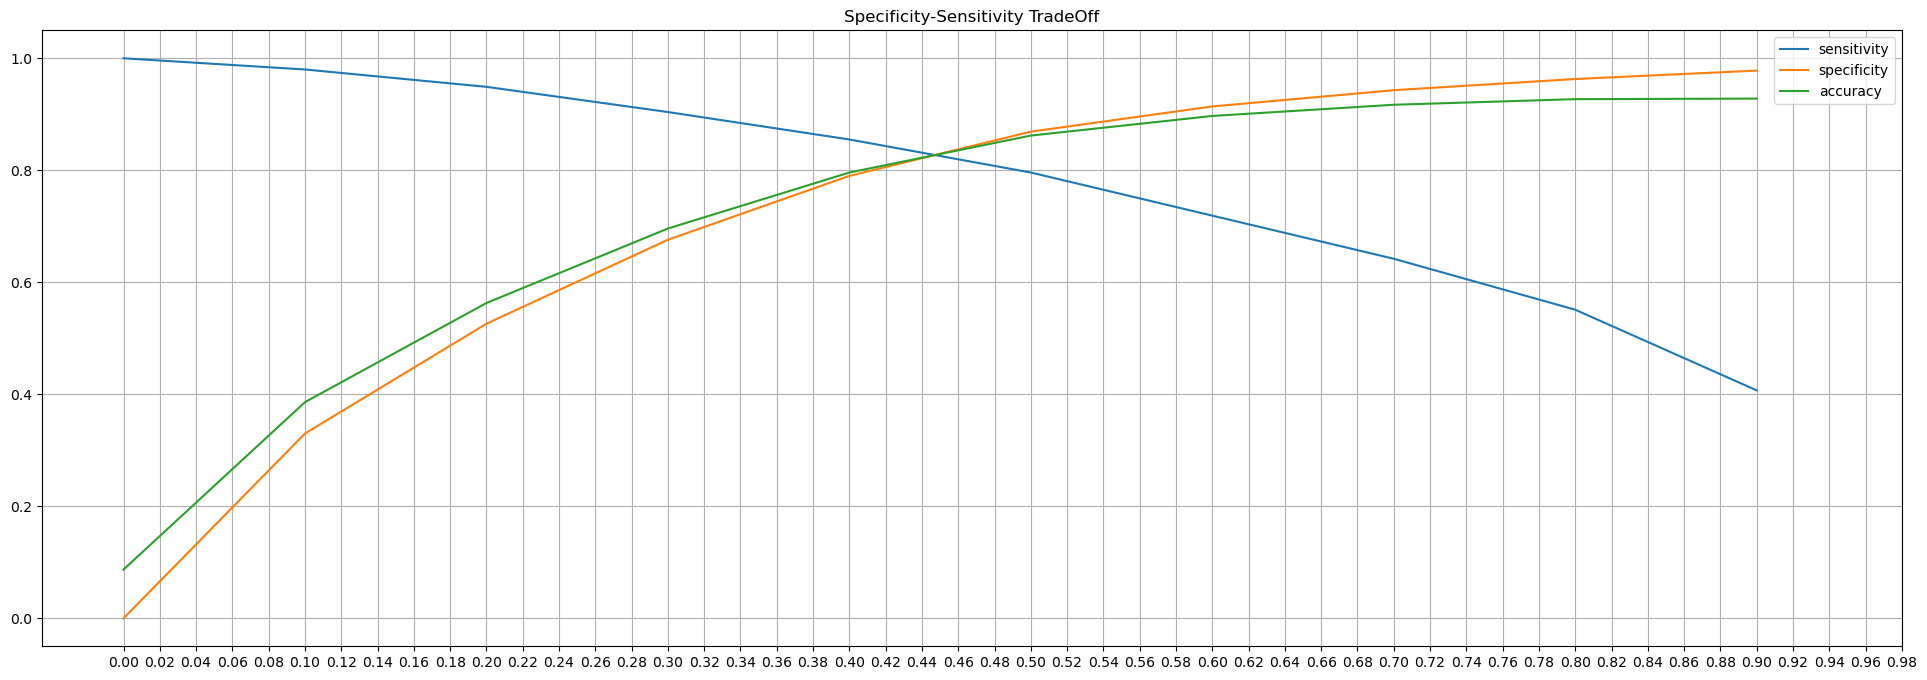

In [299]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [318]:
optimum_cutoff = 0.45
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15991  3196]
 [  317  1503]]

Confusion Matrix for test: 
 [[   3 8228]
 [   0  773]]


In [319]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.833
Sensitivity / True Positive Rate / Recall : 0.826
Specificity / True Negative Rate :  0.833
Precision / Positive Predictive Value : 0.32
F1-score : 0.461


Test Performance : 

Accuracy : 0.086
Sensitivity / True Positive Rate / Recall : 1.0
Specificity / True Negative Rate :  0.0
Precision / Positive Predictive Value : 0.086
F1-score : 0.158


In [320]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

## Model is overfitting given we have a lot of variables present in it and its test-score is very less
## It has very high TPR which is overfitting in case of the test data 

ROC AUC score for Train :  0.9 

ROC AUC score for Test :  0.826


#### Generializing model building to improve on the model building and reduce overfitting 

In [343]:
from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
rfe = RFE(estimator=lr,n_features_to_select=25)
results = rfe.fit(X_train,y_train)

# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
49,og_others_7,1,True
124,total_rech_data_6,1,True
129,av_rech_amt_data_8,1,True
38,std_og_t2f_mou_8,1,True
37,std_og_t2f_mou_7,1,True
170,std_og_t2m_mou_6_perc,1,True
114,total_rech_num_8,1,True
166,loc_ic_t2f_mou_8_perc,1,True
71,std_ic_t2m_mou_8,1,True
163,loc_ic_t2m_mou_8_perc,1,True


In [344]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['og_others_7',
 'total_rech_data_6',
 'av_rech_amt_data_8',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_7',
 'std_og_t2m_mou_6_perc',
 'total_rech_num_8',
 'loc_ic_t2f_mou_8_perc',
 'std_ic_t2m_mou_8',
 'loc_ic_t2m_mou_8_perc',
 'loc_og_t2c_mou_6',
 'roam_tag_No Roaming',
 'loc_ic_t2t_mou_8_perc',
 'total_ic_mou_8',
 'total_rech_num_7',
 'std_ic_t2f_mou_7',
 'sachet_delta_2g',
 'std_ic_t2m_mou_8_perc',
 'isd_ic_mou_8',
 'loc_og_t2f_mou_7_perc',
 'std_ic_t2t_mou_7_perc',
 'sachet_3g_7',
 'std_ic_t2f_mou_8_perc',
 'loc_og_t2m_mou_8_perc',
 'total_rech_num_6']

In [345]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
logr = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38348
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13289.
Date:                Mon, 07 Aug 2023   Deviance:                       26578.
Time:                        15:17:09   Pearson chi2:                 1.80e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5003
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.8442      0.024     35.406      0.000       0.798       0.891
og_others_7               0.0580      0.025      2.345      0.019       0.010       0.107
total_rech_data_6         0.0466      0.024      1.922      0.055      -0.001       0.094
av_rech_amt_data_8       -0.6134      0.027    -23.146      0.000      -0.665      -0.561
std_og_t2f_mou_8         -0.1304      0.033     -3.993      0.000      -0.194      -0.066
std_og_t2f_mou_7          0.0489      0.028      1.757      0.079      -0.006       0.103
std_og_t2m_mou_6_perc     0.0240      0.017      1.393      0.164      -0.010       0.058
total_rech_num_8         -0.8764      0.029    -30.237      0.000      -0.933      -0.820
loc_ic_t2f_mou_8_perc    -0.2822      0.017    -17.037      0.000      -0.315      -0.250
std_ic_t2m_mou_8          0.0756      0.030      2.541      0.011       0.017       0.134
loc_ic_t2m_mou_8_perc    -0.8616      0.032    -26.685      0.000      -0.925      -0.798
loc_og_t2c_mou_6         -0.0366      0.020     -1.864      0.062      -0.075       0.002
roam_tag_No Roaming      -1.9136      0.034    -55.626      0.000      -1.981      -1.846
loc_ic_t2t_mou_8_perc    -0.5203      0.019    -27.158      0.000      -0.558      -0.483
total_ic_mou_8           -1.0386      0.037    -27.803      0.000      -1.112      -0.965
total_rech_num_7          0.6482      0.027     23.902      0.000       0.595       0.701
std_ic_t2f_mou_7          0.0762      0.017      4.362      0.000       0.042       0.110
sachet_delta_2g           0.0109      0.021      0.522      0.602      -0.030       0.052
std_ic_t2m_mou_8_perc    -0.1623      0.020     -8.079      0.000      -0.202      -0.123
isd_ic_mou_8              0.2012      0.018     11.112      0.000       0.166       0.237
loc_og_t2f_mou_7_perc    -0.0938      0.017     -5.502      0.000      -0.127      -0.060
std_ic_t2t_mou_7_perc    -0.0104      0.017     -0.613      0.540      -0.044       0.023
sachet_3g_7               0.0078      0.019      0.413      0.679      -0.029       0.045
std_ic_t2f_mou_8_perc    -0.1170      0.020     -5.988      0.000      -0.155      -0.079
loc_og_t2m_mou_8_perc    -0.1322      0.027     -4.869      0.000      -0.185      -0.079
total_rech_num_6          0.0923      0.022      4.141      0.000       0.049       0.136
=========================================================================================
"""

In [346]:
# Using P-value and vif for manual feature elimination
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train_resampled, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train_resampled, logr_fit, rfe_selected_columns)

,VIF,P-value
Features,,
loc_ic_t2m_mou_8_perc,4.10,0.0000
loc_og_t2m_mou_8_perc,3.80,0.0000
std_og_t2f_mou_7,2.62,0.0790
std_og_t2f_mou_8,2.35,0.0001
total_rech_num_7,2.25,0.0000
total_rech_num_8,2.21,0.0000
std_ic_t2m_mou_8_perc,1.95,0.0000
total_rech_data_6,1.79,0.0546
total_rech_num_6,1.64,0.0000


In [332]:
## We have VIF of around 4, but there are few variables which have higher p-value , we can remove that variable

In [347]:
## removing variable sachet_3g_7 based on p-values
selected_columns = rfe_selected_columns
selected_columns.remove('sachet_3g_7')
selected_columns

['og_others_7',
 'total_rech_data_6',
 'av_rech_amt_data_8',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_7',
 'std_og_t2m_mou_6_perc',
 'total_rech_num_8',
 'loc_ic_t2f_mou_8_perc',
 'std_ic_t2m_mou_8',
 'loc_ic_t2m_mou_8_perc',
 'loc_og_t2c_mou_6',
 'roam_tag_No Roaming',
 'loc_ic_t2t_mou_8_perc',
 'total_ic_mou_8',
 'total_rech_num_7',
 'std_ic_t2f_mou_7',
 'sachet_delta_2g',
 'std_ic_t2m_mou_8_perc',
 'isd_ic_mou_8',
 'loc_og_t2f_mou_7_perc',
 'std_ic_t2t_mou_7_perc',
 'std_ic_t2f_mou_8_perc',
 'loc_og_t2m_mou_8_perc',
 'total_rech_num_6']

In [348]:
## building 2nd model 
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38349
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13289.
Date:                Mon, 07 Aug 2023   Deviance:                       26578.
Time:                        15:17:55   Pearson chi2:                 1.80e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5003
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.8443      0.024     35.405      0.000       0.798       0.891
og_others_7               0.0580      0.025      2.345      0.019       0.010       0.107
total_rech_data_6         0.0512      0.022      2.374      0.018       0.009       0.093
av_rech_amt_data_8       -0.6137      0.026    -23.164      0.000      -0.666      -0.562
std_og_t2f_mou_8         -0.1303      0.033     -3.990      0.000      -0.194      -0.066
std_og_t2f_mou_7          0.0489      0.028      1.757      0.079      -0.006       0.103
std_og_t2m_mou_6_perc     0.0238      0.017      1.381      0.167      -0.010       0.057
total_rech_num_8         -0.8771      0.029    -30.303      0.000      -0.934      -0.820
loc_ic_t2f_mou_8_perc    -0.2822      0.017    -17.040      0.000      -0.315      -0.250
std_ic_t2m_mou_8          0.0757      0.030      2.543      0.011       0.017       0.134
loc_ic_t2m_mou_8_perc    -0.8615      0.032    -26.682      0.000      -0.925      -0.798
loc_og_t2c_mou_6         -0.0367      0.020     -1.873      0.061      -0.075       0.002
roam_tag_No Roaming      -1.9133      0.034    -55.627      0.000      -1.981      -1.846
loc_ic_t2t_mou_8_perc    -0.5204      0.019    -27.165      0.000      -0.558      -0.483
total_ic_mou_8           -1.0389      0.037    -27.818      0.000      -1.112      -0.966
total_rech_num_7          0.6496      0.027     24.146      0.000       0.597       0.702
std_ic_t2f_mou_7          0.0762      0.017      4.361      0.000       0.042       0.110
sachet_delta_2g           0.0129      0.020      0.631      0.528      -0.027       0.053
std_ic_t2m_mou_8_perc    -0.1621      0.020     -8.074      0.000      -0.202      -0.123
isd_ic_mou_8              0.2012      0.018     11.108      0.000       0.166       0.237
loc_og_t2f_mou_7_perc    -0.0937      0.017     -5.501      0.000      -0.127      -0.060
std_ic_t2t_mou_7_perc    -0.0105      0.017     -0.618      0.537      -0.044       0.023
std_ic_t2f_mou_8_perc    -0.1170      0.020     -5.988      0.000      -0.155      -0.079
loc_og_t2m_mou_8_perc    -0.1325      0.027     -4.882      0.000      -0.186      -0.079
total_rech_num_6          0.0918      0.022      4.126      0.000       0.048       0.135
=========================================================================================
"""

In [349]:
# vif and p-values
vif(X_train_resampled, logr2_fit, selected_columns)

,VIF,P-value
Features,,
loc_ic_t2m_mou_8_perc,4.10,0.0000
loc_og_t2m_mou_8_perc,3.80,0.0000
std_og_t2f_mou_7,2.62,0.0789
std_og_t2f_mou_8,2.35,0.0001
total_rech_num_7,2.21,0.0000
total_rech_num_8,2.20,0.0000
std_ic_t2m_mou_8_perc,1.95,0.0000
total_rech_num_6,1.64,0.0000
total_ic_mou_8,1.61,0.0000


In [350]:
## removing std_ic_t2t_mou_7_perc based on p-value
selected_columns.remove('std_ic_t2t_mou_7_perc')
selected_columns

['og_others_7',
 'total_rech_data_6',
 'av_rech_amt_data_8',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_7',
 'std_og_t2m_mou_6_perc',
 'total_rech_num_8',
 'loc_ic_t2f_mou_8_perc',
 'std_ic_t2m_mou_8',
 'loc_ic_t2m_mou_8_perc',
 'loc_og_t2c_mou_6',
 'roam_tag_No Roaming',
 'loc_ic_t2t_mou_8_perc',
 'total_ic_mou_8',
 'total_rech_num_7',
 'std_ic_t2f_mou_7',
 'sachet_delta_2g',
 'std_ic_t2m_mou_8_perc',
 'isd_ic_mou_8',
 'loc_og_t2f_mou_7_perc',
 'std_ic_t2f_mou_8_perc',
 'loc_og_t2m_mou_8_perc',
 'total_rech_num_6']

In [351]:
## Building 3rd model 
logr3 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38350
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13289.
Date:                Mon, 07 Aug 2023   Deviance:                       26578.
Time:                        15:18:30   Pearson chi2:                 1.81e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5003
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.8433      0.024     35.439      0.000       0.797       0.890
og_others_7               0.0581      0.025      2.348      0.019       0.010       0.107
total_rech_data_6         0.0517      0.022      2.397      0.017       0.009       0.094
av_rech_amt_data_8       -0.6126      0.026    -23.179      0.000      -0.664      -0.561
std_og_t2f_mou_8         -0.1302      0.033     -3.989      0.000      -0.194      -0.066
std_og_t2f_mou_7          0.0488      0.028      1.754      0.079      -0.006       0.103
std_og_t2m_mou_6_perc     0.0261      0.017      1.553      0.120      -0.007       0.059
total_rech_num_8         -0.8780      0.029    -30.372      0.000      -0.935      -0.821
loc_ic_t2f_mou_8_perc    -0.2825      0.017    -17.063      0.000      -0.315      -0.250
std_ic_t2m_mou_8          0.0761      0.030      2.560      0.010       0.018       0.134
loc_ic_t2m_mou_8_perc    -0.8635      0.032    -26.871      0.000      -0.926      -0.801
loc_og_t2c_mou_6         -0.0368      0.020     -1.882      0.060      -0.075       0.002
roam_tag_No Roaming      -1.9102      0.034    -56.186      0.000      -1.977      -1.844
loc_ic_t2t_mou_8_perc    -0.5222      0.019    -27.571      0.000      -0.559      -0.485
total_ic_mou_8           -1.0392      0.037    -27.823      0.000      -1.112      -0.966
total_rech_num_7          0.6498      0.027     24.159      0.000       0.597       0.702
std_ic_t2f_mou_7          0.0765      0.017      4.386      0.000       0.042       0.111
sachet_delta_2g           0.0127      0.020      0.624      0.532      -0.027       0.053
std_ic_t2m_mou_8_perc    -0.1596      0.020     -8.118      0.000      -0.198      -0.121
isd_ic_mou_8              0.2013      0.018     11.116      0.000       0.166       0.237
loc_og_t2f_mou_7_perc    -0.0941      0.017     -5.520      0.000      -0.127      -0.061
std_ic_t2f_mou_8_perc    -0.1154      0.019     -5.958      0.000      -0.153      -0.077
loc_og_t2m_mou_8_perc    -0.1325      0.027     -4.883      0.000      -0.186      -0.079
total_rech_num_6          0.0910      0.022      4.099      0.000       0.047       0.135
=========================================================================================
"""

In [352]:
# vif and p-values
vif(X_train_resampled, logr3_fit, selected_columns)

,VIF,P-value
Features,,
loc_ic_t2m_mou_8_perc,4.08,0.0000
loc_og_t2m_mou_8_perc,3.80,0.0000
std_og_t2f_mou_7,2.62,0.0794
std_og_t2f_mou_8,2.35,0.0001
total_rech_num_7,2.21,0.0000
total_rech_num_8,2.20,0.0000
std_ic_t2m_mou_8_perc,1.89,0.0000
total_rech_num_6,1.63,0.0000
total_ic_mou_8,1.61,0.0000


In [353]:
## removing sachet_delta_2g based on p-value
selected_columns.remove('sachet_delta_2g')
selected_columns

['og_others_7',
 'total_rech_data_6',
 'av_rech_amt_data_8',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_7',
 'std_og_t2m_mou_6_perc',
 'total_rech_num_8',
 'loc_ic_t2f_mou_8_perc',
 'std_ic_t2m_mou_8',
 'loc_ic_t2m_mou_8_perc',
 'loc_og_t2c_mou_6',
 'roam_tag_No Roaming',
 'loc_ic_t2t_mou_8_perc',
 'total_ic_mou_8',
 'total_rech_num_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2m_mou_8_perc',
 'isd_ic_mou_8',
 'loc_og_t2f_mou_7_perc',
 'std_ic_t2f_mou_8_perc',
 'loc_og_t2m_mou_8_perc',
 'total_rech_num_6']

In [354]:
## Building 4th model 
logr4 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr4_fit = logr4.fit()
logr4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38351
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13289.
Date:                Mon, 07 Aug 2023   Deviance:                       26579.
Time:                        15:19:07   Pearson chi2:                 1.72e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5003
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.8432      0.024     35.438      0.000       0.797       0.890
og_others_7               0.0580      0.025      2.346      0.019       0.010       0.107
total_rech_data_6         0.0449      0.019      2.399      0.016       0.008       0.082
av_rech_amt_data_8       -0.6086      0.026    -23.795      0.000      -0.659      -0.558
std_og_t2f_mou_8         -0.1304      0.033     -3.993      0.000      -0.194      -0.066
std_og_t2f_mou_7          0.0489      0.028      1.757      0.079      -0.006       0.103
std_og_t2m_mou_6_perc     0.0262      0.017      1.559      0.119      -0.007       0.059
total_rech_num_8         -0.8745      0.028    -30.854      0.000      -0.930      -0.819
loc_ic_t2f_mou_8_perc    -0.2825      0.017    -17.064      0.000      -0.315      -0.250
std_ic_t2m_mou_8          0.0760      0.030      2.554      0.011       0.018       0.134
loc_ic_t2m_mou_8_perc    -0.8634      0.032    -26.871      0.000      -0.926      -0.800
loc_og_t2c_mou_6         -0.0367      0.020     -1.877      0.060      -0.075       0.002
roam_tag_No Roaming      -1.9103      0.034    -56.193      0.000      -1.977      -1.844
loc_ic_t2t_mou_8_perc    -0.5220      0.019    -27.570      0.000      -0.559      -0.485
total_ic_mou_8           -1.0392      0.037    -27.823      0.000      -1.112      -0.966
total_rech_num_7          0.6472      0.027     24.356      0.000       0.595       0.699
std_ic_t2f_mou_7          0.0765      0.017      4.384      0.000       0.042       0.111
std_ic_t2m_mou_8_perc    -0.1595      0.020     -8.113      0.000      -0.198      -0.121
isd_ic_mou_8              0.2012      0.018     11.109      0.000       0.166       0.237
loc_og_t2f_mou_7_perc    -0.0939      0.017     -5.515      0.000      -0.127      -0.061
std_ic_t2f_mou_8_perc    -0.1154      0.019     -5.961      0.000      -0.153      -0.077
loc_og_t2m_mou_8_perc    -0.1326      0.027     -4.885      0.000      -0.186      -0.079
total_rech_num_6          0.0907      0.022      4.089      0.000       0.047       0.134
=========================================================================================
"""

In [355]:
# vif and p-values
vif(X_train_resampled, logr4_fit, selected_columns)

,VIF,P-value
Features,,
loc_ic_t2m_mou_8_perc,4.08,0.0000
loc_og_t2m_mou_8_perc,3.80,0.0000
std_og_t2f_mou_7,2.62,0.0790
std_og_t2f_mou_8,2.35,0.0001
total_rech_num_7,2.16,0.0000
total_rech_num_8,2.07,0.0000
std_ic_t2m_mou_8_perc,1.89,0.0000
total_rech_num_6,1.63,0.0000
total_ic_mou_8,1.61,0.0000


In [356]:
## removing loc_ic_t2m_mou_8_perc based on VIF value 
selected_columns.remove('loc_ic_t2m_mou_8_perc')
## Building 5th model 
logr5 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr5_fit = logr5.fit()
# vif and p-values
vif(X_train_resampled, logr5_fit, selected_columns)

,VIF,P-value
Features,,
std_og_t2f_mou_7,2.62,0.0305
std_og_t2f_mou_8,2.35,0.0000
total_rech_num_7,2.15,0.0000
total_rech_num_8,2.05,0.0000
std_ic_t2m_mou_8_perc,1.75,0.0000
loc_og_t2m_mou_8_perc,1.63,0.0000
total_rech_num_6,1.61,0.0000
total_ic_mou_8,1.60,0.0000
std_ic_t2m_mou_8,1.29,0.0000


In [357]:
## All the model values are lesser than 4 in VIF and p-value in range of 0.05 so this will be our final model 
## to work with 
logr5_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38352
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13671.
Date:                Mon, 07 Aug 2023   Deviance:                       27343.
Time:                        15:22:11   Pearson chi2:                 6.93e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4902
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.6962      0.022     31.645      0.000       0.653       0.739
og_others_7               0.0557      0.025      2.224      0.026       0.007       0.105
total_rech_data_6         0.0343      0.019      1.844      0.065      -0.002       0.071
av_rech_amt_data_8       -0.5951      0.025    -23.518      0.000      -0.645      -0.546
std_og_t2f_mou_8         -0.1406      0.033     -4.284      0.000      -0.205      -0.076
std_og_t2f_mou_7          0.0596      0.028      2.164      0.030       0.006       0.114
std_og_t2m_mou_6_perc     0.0495      0.017      2.995      0.003       0.017       0.082
total_rech_num_8         -0.9480      0.028    -33.289      0.000      -1.004      -0.892
loc_ic_t2f_mou_8_perc    -0.1656      0.016    -10.165      0.000      -0.198      -0.134
std_ic_t2m_mou_8          0.1323      0.029      4.497      0.000       0.075       0.190
loc_og_t2c_mou_6         -0.0372      0.018     -2.075      0.038      -0.072      -0.002
roam_tag_No Roaming      -1.9613      0.033    -58.768      0.000      -2.027      -1.896
loc_ic_t2t_mou_8_perc    -0.2907      0.016    -18.071      0.000      -0.322      -0.259
total_ic_mou_8           -1.2148      0.039    -31.405      0.000      -1.291      -1.139
total_rech_num_7          0.6139      0.026     23.192      0.000       0.562       0.666
std_ic_t2f_mou_7          0.0808      0.019      4.246      0.000       0.044       0.118
std_ic_t2m_mou_8_perc    -0.2985      0.019    -15.578      0.000      -0.336      -0.261
isd_ic_mou_8              0.2246      0.019     11.671      0.000       0.187       0.262
loc_og_t2f_mou_7_perc    -0.1082      0.016     -6.596      0.000      -0.140      -0.076
std_ic_t2f_mou_8_perc    -0.1708      0.020     -8.740      0.000      -0.209      -0.133
loc_og_t2m_mou_8_perc    -0.6392      0.020    -32.342      0.000      -0.678      -0.600
total_rech_num_6          0.1372      0.022      6.109      0.000       0.093       0.181
=========================================================================================
"""

In [358]:
# Prediction 
y_train_pred_lr = logr5_fit.predict(sm.add_constant(X_train_resampled[selected_columns]))
y_train_pred_lr.head()

0    0.084011
1    0.074145
2    0.067052
3    0.027497
4    0.003904
dtype: float64

In [360]:
y_test_pred_lr = logr5_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

11959    0.037234
24283    0.983838
23984    0.321745
28140    0.407447
16635    0.183418
dtype: float64

In [361]:
## Performance
## finding the sensitivity and specificity with respect to the thresholds 
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train_resampled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [362]:
#DataFrame for Performance metrics at each threshold

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    logr_metrics_df =  logr_metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
logr_metrics_df.index = thresholds
logr_metrics_df

## at 0.5 we have the best sensitivity and specificity and accuracy based on how close these values are 
## range from 0.4 to 0.5 is acting really greate place to start with model performance 

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.500
0.1,0.980,0.455,0.717
0.2,0.959,0.633,0.796
0.3,0.935,0.732,0.833
0.4,0.897,0.800,0.849
0.5,0.853,0.854,0.853
0.6,0.793,0.899,0.846
0.7,0.720,0.933,0.827
0.8,0.612,0.960,0.786
0.9,0.487,0.977,0.732


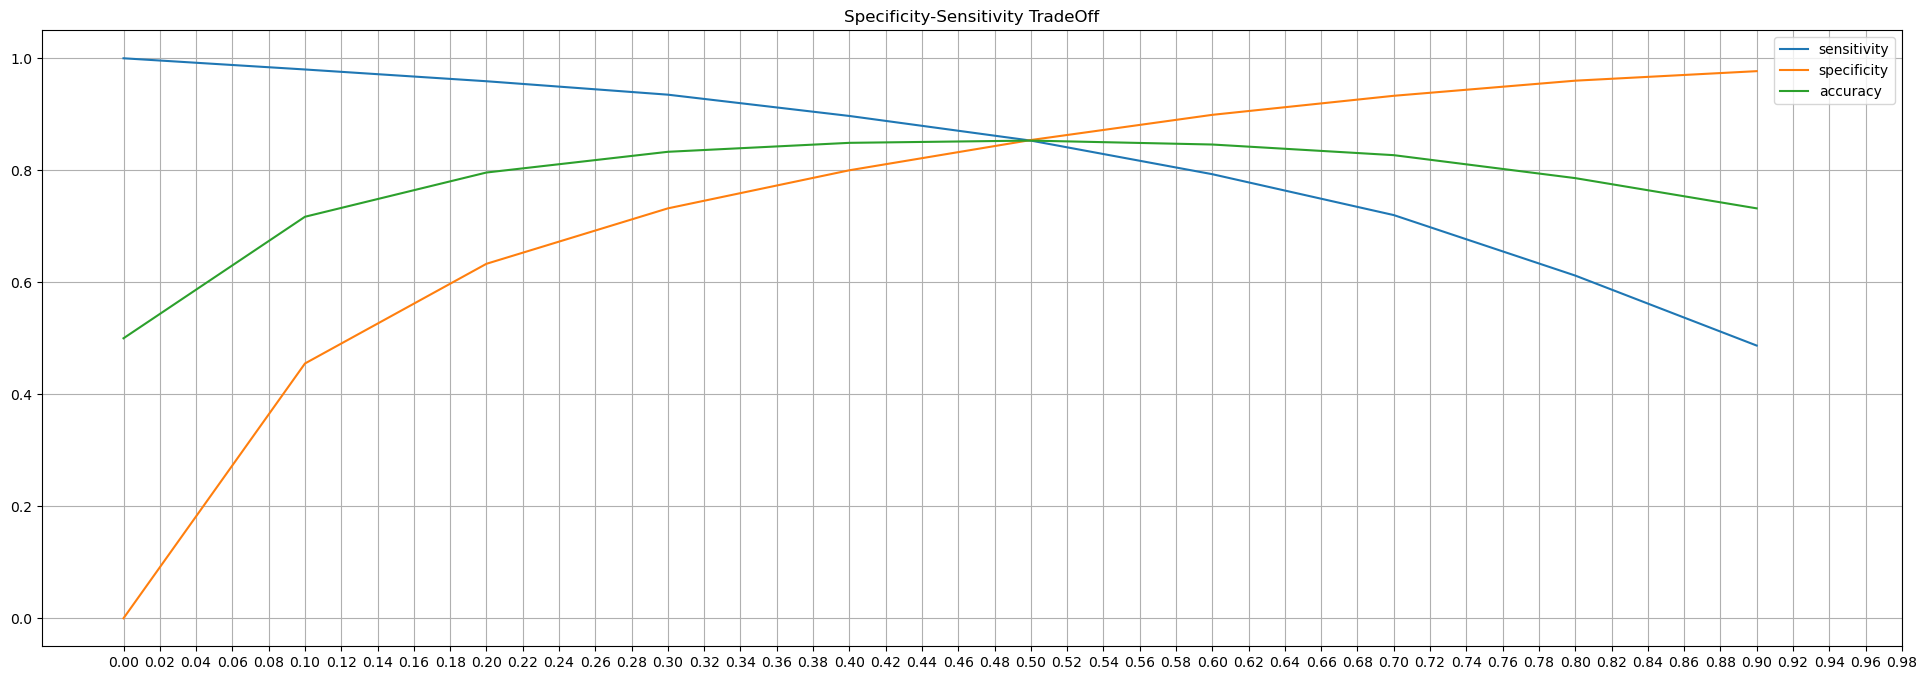

In [363]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

## This  graph is very specifically crossing at around 0.5 as threshold, which should be the go to place 
#3 for the prediction

In [404]:
optimum_cutoff = 0.497
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[16344  2843]
 [ 2803 16384]]

Confusion Matrix for test: 
 [[7049 1182]
 [ 181  592]]


In [405]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.853
Sensitivity / True Positive Rate / Recall : 0.854
Specificity / True Negative Rate :  0.852
Precision / Positive Predictive Value : 0.852
F1-score : 0.853


Test Performance : 

Accuracy : 0.849
Sensitivity / True Positive Rate / Recall : 0.766
Specificity / True Negative Rate :  0.856
Precision / Positive Predictive Value : 0.334
F1-score : 0.465


Now we have reduced the overfitting after removing the columns and also we can se how our model is predicting the classes 
correctly but it has very low precision, which might be that case tha our over-samling technique needs some tuning to make
it better

In [406]:
# ROC_AUC score 
print('ROC AUC score for Train : ',round(roc_auc_score(y_train_resampled, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

ROC AUC score for Train :  0.924 

ROC AUC score for Test :  0.882


In [407]:
## Interpretable model summary
lr_summary_html = logr5_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



roam_tag_No Roaming     -1.9613
total_ic_mou_8          -1.2148
total_rech_num_8        -0.9480
const                    0.6962
loc_og_t2m_mou_8_perc   -0.6392
total_rech_num_7         0.6139
av_rech_amt_data_8      -0.5951
std_ic_t2m_mou_8_perc   -0.2985
loc_ic_t2t_mou_8_perc   -0.2907
isd_ic_mou_8             0.2246
std_ic_t2f_mou_8_perc   -0.1708
loc_ic_t2f_mou_8_perc   -0.1656
std_og_t2f_mou_8        -0.1406
total_rech_num_6         0.1372
std_ic_t2m_mou_8         0.1323
loc_og_t2f_mou_7_perc   -0.1082
std_ic_t2f_mou_7         0.0808
std_og_t2f_mou_7         0.0596
og_others_7              0.0557
std_og_t2m_mou_6_perc    0.0495
loc_og_t2c_mou_6        -0.0372
total_rech_data_6        0.0343
Name: coef, dtype: float64

### Building Non-linear model using PCA and boosting algorithms 

In [448]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train_resampled) # note that pca is fit on resampled train set. 
pca.components_

array([[ 4.10713994e-02,  1.32038188e-01,  1.78590576e-01, ...,
         1.07231643e-02, -2.33537239e-02,  1.92513371e-03],
       [ 4.69271079e-02,  1.02494097e-01,  6.44761194e-02, ...,
        -7.05008262e-03,  2.22391257e-02, -2.07220705e-03],
       [ 6.25208099e-02,  1.13915097e-01,  1.12018027e-01, ...,
         7.78224518e-03, -3.37757534e-02,  6.83455052e-04],
       ...,
       [-0.00000000e+00,  8.89190741e-03, -8.72216603e-03, ...,
        -2.62702186e-16, -8.32667268e-17, -4.51895465e-16],
       [-5.89729639e-01,  3.48328746e-01,  2.29567489e-01, ...,
        -1.86482774e-17,  1.27935856e-17,  8.67361738e-18],
       [ 0.00000000e+00,  1.09054208e-02, -1.06972426e-02, ...,
        -5.60396998e-17,  1.30104261e-17, -1.09504419e-16]])

In [449]:
pca.explained_variance_ratio_

array([8.00022333e-02, 6.03487097e-02, 4.47347151e-02, 4.05001257e-02,
       3.85869060e-02, 3.48429502e-02, 2.97948195e-02, 2.68013023e-02,
       2.60816726e-02, 2.47974529e-02, 2.43675760e-02, 2.27629411e-02,
       2.05946706e-02, 1.88347546e-02, 1.72693760e-02, 1.58946305e-02,
       1.51761679e-02, 1.42819055e-02, 1.38215019e-02, 1.28020630e-02,
       1.18284146e-02, 1.03730756e-02, 1.00506456e-02, 9.30227704e-03,
       9.19452673e-03, 8.95936531e-03, 8.59077302e-03, 8.25067571e-03,
       8.03002228e-03, 7.66448495e-03, 7.60367519e-03, 7.48037981e-03,
       7.10931514e-03, 6.82687613e-03, 6.78841839e-03, 6.56141782e-03,
       6.33297627e-03, 6.16062161e-03, 5.99809388e-03, 5.93525336e-03,
       5.85851549e-03, 5.72038832e-03, 5.67797016e-03, 5.56403135e-03,
       5.39106572e-03, 5.09548943e-03, 4.98248092e-03, 4.87466927e-03,
       4.69225193e-03, 4.67724016e-03, 4.62347784e-03, 4.57260835e-03,
       4.37547099e-03, 4.34315617e-03, 4.31259975e-03, 4.21972713e-03,
      

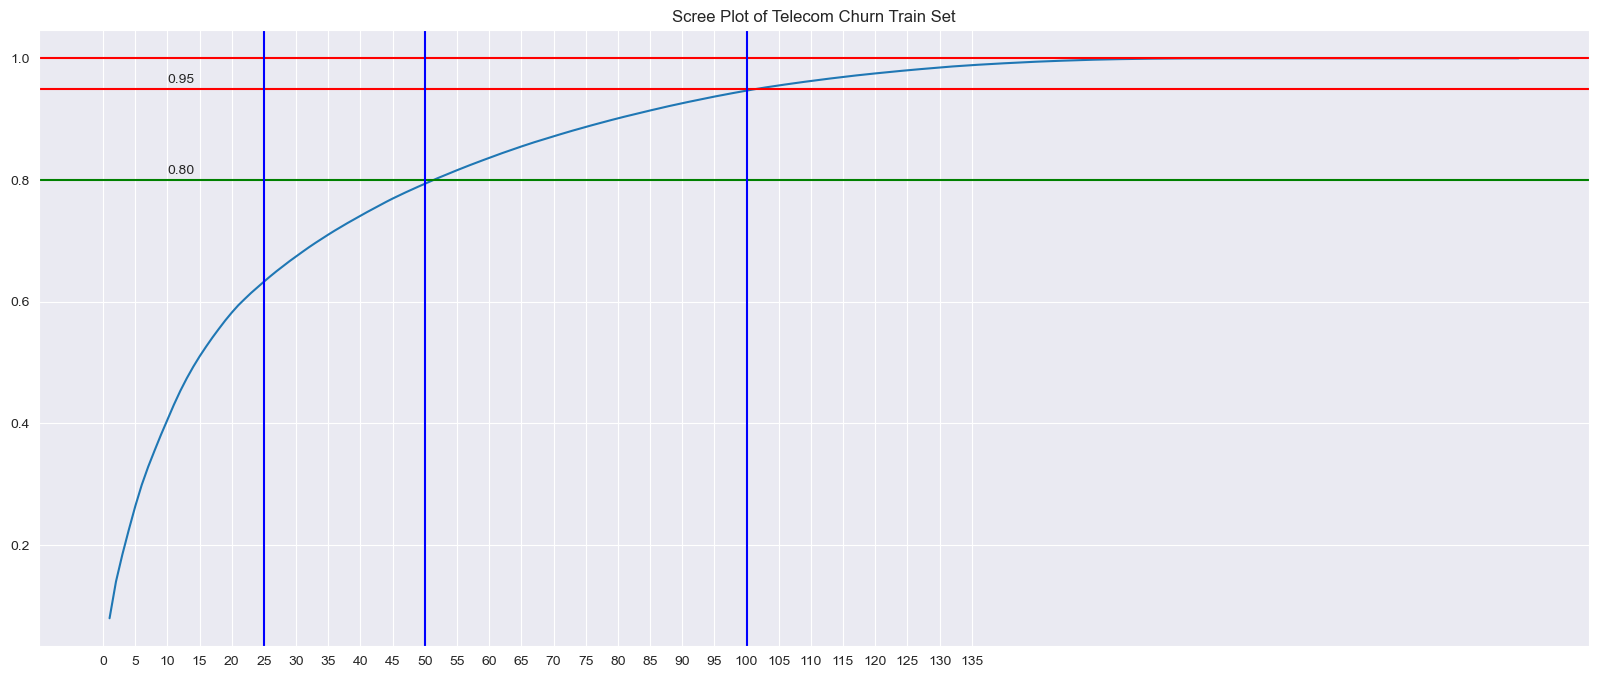

In [450]:
## Scree Plot to understand variance by components
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(np.arange(1,len(var_cum) + 1), var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.8,color='g')
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(25,color='b')
plt.axvline(50,color='b')
plt.axvline(100,color='b')
plt.text(10,0.81,'0.80')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

Variables above 100 and less than 105 explains about 95% of the total variance in the data set, we can now go ahead with use of 105 components to build the model

In [454]:
# Perform PCA using the first 55 components
pca_final = PCA(n_components=105, random_state=42)
transformed_data = pca_final.fit_transform(X_train_resampled)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,106)], index = X_train_resampled.index)
data_train_pca = pd.concat([X_train_pca, y_train_resampled], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75,PC_76,PC_77,PC_78,PC_79,PC_80,PC_81,PC_82,PC_83,PC_84,PC_85,PC_86,PC_87,PC_88,PC_89,PC_90,PC_91,PC_92,PC_93,PC_94,PC_95,PC_96,PC_97,PC_98,PC_99,PC_100,PC_101,PC_102,PC_103,PC_104,PC_105,churn
0,2.154482,-6.742373,-0.274372,-1.300113,-1.038461,1.426628,1.807948,2.577808,-1.802225,-0.498014,2.722582,-0.628661,-1.796938,-3.299603,4.690178,3.541287,-4.537115,3.959449,2.820336,2.001770,-0.457681,-0.475704,-0.808433,-1.208179,5.594267,-3.447452,-4.665347,1.891994,1.162903,-0.610499,-1.595824,-3.330966,-0.547098,0.119655,1.289463,-2.662622,0.028000,-0.532582,-0.205944,0.639370,0.697409,-0.494722,-1.290762,0.558220,0.241673,-0.727519,-0.046175,-0.405768,-0.107132,-0.472428,-0.038685,-0.801670,-0.424025,1.902020,0.366036,-1.642028,-0.974836,0.083507,-0.189343,0.833505,0.599125,0.081886,0.459305,-0.242085,-0.556346,0.834182,-1.212751,0.749392,0.383704,0.458729,-0.027440,-0.574919,-0.412679,0.625981,0.738591,0.139752,-0.625437,0.447987,0.216687,0.962976,-1.131611,-0.494757,0.347779,0.412075,-1.027944,1.083397,-0.400383,-0.110231,0.552948,0.609029,0.373538,0.632213,-0.137196,-0.281528,-0.792452,-0.598002,0.742174,-0.521496,-0.166363,-0.023384,-0.547346,0.553712,1.401436,0.632587,-0.029084,0
1,0.285788,0.886744,-1.641352,-1.882970,0.901734,0.465411,-0.371076,0.088993,1.855776,0.199396,-0.808521,1.815811,-0.504568,0.970855,-0.362025,0.492734,-0.168724,-1.223547,0.584002,-0.824519,-0.741406,0.214783,0.175126,0.267391,0.042926,0.213798,0.425675,-0.083829,0.030605,0.487506,-0.474169,0.887586,-1.529467,1.323600,2.071614,0.779120,-0.492845,-0.225416,0.324586,-0.166106,0.741251,-0.984317,0.135267,-0.000601,0.279023,-0.100687,-0.519534,0.415052,0.653429,-1.445936,0.483158,0.354665,0.001167,0.285967,-0.178917,0.324935,-0.259084,-0.412982,-0.249187,0.281357,-0.140433,0.474555,-0.202477,-0.538782,0.039419,0.518826,0.349516,0.517799,-0.256159,-0.806876,-0.696964,0.097186,0.444787,-0.630592,-0.686125,0.770338,-0.198679,-0.314360,0.367204,0.201302,-0.201124,-0.254383,0.111789,-0.162174,-0.307767,-0.695921,0.252410,0.179078,0.282673,0.106728,0.201475,0.356285,-0.275481,0.540210,0.085656,-0.467950,0.078444,0.262335,0.553688,-0.310158,0.040586,0.255016,-0.470689,-0.267476,-0.470428,0
2,-1.939687,-4.530847,4.707440,-0.041143,-2.999515,-1.204142,-3.001766,0.392443,1.871696,-3.322164,0.177099,3.510764,0.713214,1.706928,0.190187,-0.662319,-0.399974,-1.019929,0.242142,0.749113,0.622437,1.462515,1.004139,-0.006813,-0.303267,0.284251,-0.653004,-0.323449,-1.375810,-0.359467,0.483800,0.291129,0.295886,-0.896329,1.102788,-1.485706,-2.025425,1.598820,-0.746183,-0.775061,0.934459,0.721524,0.479163,-1.365169,0.047821,0.827741,1.071463,-1.639235,-1.224624,-0.002653,1.029980,-0.698329,0.109429,2.058963,0.281796,-0.455641,1.128696,0.586830,-2.011254,-0.545884,1.276139,0.135350,1.591736,0.645592,-0.153515,-1.377098,-1.271530,0.712955,0.312138,-0.529976,-0.805341,1.294840,-0.927236,1.346313,-0.921715,-0.033212,-0.856162,-1.254281,0.828957,-0.538739,-0.390558,0.775653,-0.668944,-0.164441,0.327846,-0.657996,-0.037298,0.405588,0.280051,1.539966,-0.919532,-0.557303,-0.783927,0.210343,-0.807751,0.036722,-0.979873,0.141288,0.591189,1.968372,0.792559,-2.035443,-1.985549,-0.235147,0.990607,0
3,1.506219,-0.017765,3.116737,-2.796542,-3.670548,1.111308,2.243519,0.759963,-1.958699,-1.964944,0.036787,1.089824,-0.075774,-0.808560,-3.629571,-0.839739,-1.911670,-0.555056,-2.122709,0.094746,0.418760,1.204238,1.690705,1.140176,-0.204730,1.106509,-0.120871,0.032127,0.065882,-1.510036,0.755969,0.665808,0.317780,-0.448768,-0.240747,-1.247694,0.170302,0.893989,-

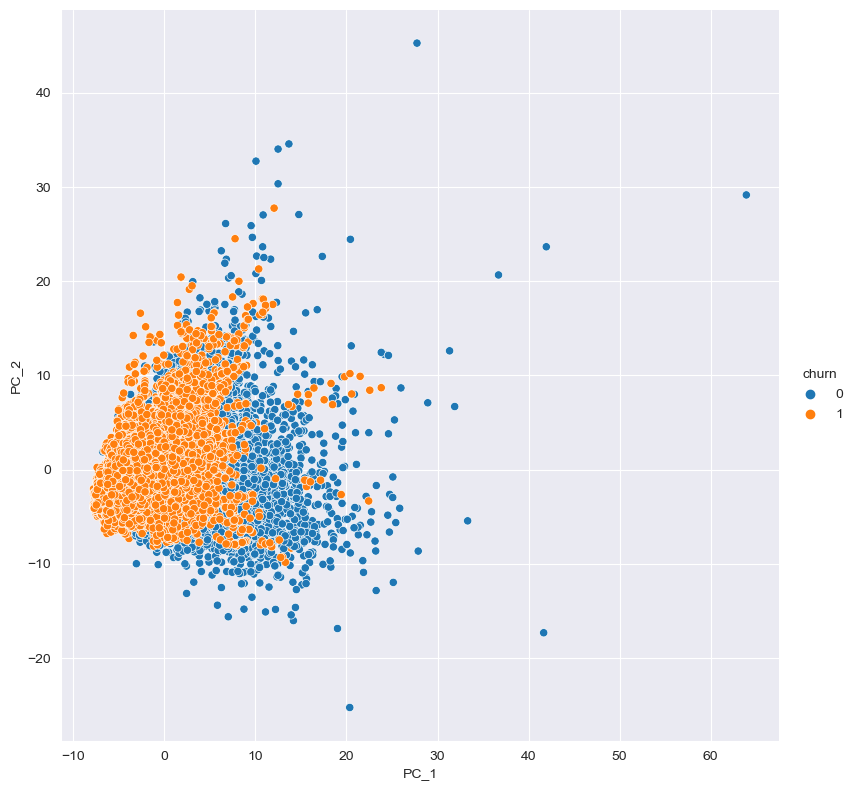

In [455]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "churn", size=8);

In [456]:
# X,y Split
y_train_pca = data_train_pca.pop('churn')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [457]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([0, 0, 0, 0, 0])

In [458]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([0, 1, 0, 0, 0])

In [460]:
train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.87
Sensitivity / True Positive Rate / Recall : 0.856
Specificity / True Negative Rate :  0.885
Precision / Positive Predictive Value : 0.881
F1-score : 0.868

Test Performance :

Accuracy : 0.875
Sensitivity / True Positive Rate / Recall : 0.759
Specificity / True Negative Rate :  0.886
Precision / Positive Predictive Value : 0.385
F1-score : 0.511


In [461]:
# Creating a Logistic regression model using pca transformed train set
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [462]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [463]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best ROC-AUC score : 0.9391899083184673
Best Parameters : {'C': 1, 'penalty': 'l2'}


In [464]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([0, 0, 0, 0, 0])

In [465]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([0, 1, 0, 0, 0])

In [467]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)
print(test_matrix)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

[[7294  937]
 [ 186  587]]
Train Performance :

Accuracy : 0.87
Sensitivity / True Positive Rate / Recall : 0.856
Specificity / True Negative Rate :  0.885
Precision / Positive Predictive Value : 0.881
F1-score : 0.868

Test Performance :

Accuracy : 0.875
Sensitivity / True Positive Rate / Recall : 0.759
Specificity / True Negative Rate :  0.886
Precision / Positive Predictive Value : 0.385
F1-score : 0.511


As it was expected, linear model with PCA will fail to work better , given we are overfitting the data and also due to orthogonal transformation of the variables , linear function fails to work efficiently, we can try with some tree models and we can use boosting or bagging to improve the fitting of the models

### PCA with Random Forest

In [472]:
y_train_resampled.value_counts()

0    19187
1    19187
Name: churn, dtype: int64

In [473]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 :0.5 , 1 : 0.5 } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=1)

In [483]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [50,100],
    'max_depth' : [5,6,7],
    'min_samples_leaf' : [25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='f1', verbose=False)

pca_rf_model_search.fit(X_train_pca, y_train_resampled)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7ff6c2a8ce50 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7ff637348ee0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7ff6c299ba30 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7ff6c3779400 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7ff6c36e0580 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7ff6c29e99a0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/drsingh/opt/

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7ff6c3e2dc40 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7ff6c2968820 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7ff6c29e67f0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7ff524f1f850 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7ff525003790 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7ff524f2dbb0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/drsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.5, 1: 0.5},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             param_grid={'max_depth': [5, 6, 7], 'min_samples_leaf': [25, 30],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=False)

In [484]:
# Optimum Hyperparameters
print('Best F1 score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best F1 score : nan
Best Parameters : {'max_depth': 5, 'min_samples_leaf': 25, 'n_estimators': 50}


In [485]:
pca_rf_model_search.cv_results_

{'mean_fit_time': array([7.13931078, 6.62136078, 6.48650724, 6.68296766, 6.84588921,
        6.63343954, 6.88900208, 6.60080326, 6.69231498, 6.54561305,
        6.62573677, 6.98761022]),
 'std_fit_time': array([0.71296067, 0.52945118, 0.34371171, 0.14618772, 0.59204458,
        0.22302599, 0.93222561, 0.14054534, 0.37696053, 0.24354926,
        0.3543226 , 0.34799043]),
 'mean_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'param_max_depth': masked_array(data=[5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[25, 25, 30, 30, 25, 25, 30, 30, 25, 25, 30, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
 

In [486]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train_resampled)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished


array([0, 0, 1, 0, 0])

In [487]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished


array([0, 1, 0, 0, 0])

In [488]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.832
Sensitivity / True Positive Rate / Recall : 0.755
Specificity / True Negative Rate :  0.909
Precision / Positive Predictive Value : 0.892
F1-score : 0.818

Test Performance :

Accuracy : 0.89
Sensitivity / True Positive Rate / Recall : 0.651
Specificity / True Negative Rate :  0.912
Precision / Positive Predictive Value : 0.41
F1-score : 0.503


In [489]:
## out of bag error 
pca_rf_best_fit.oob_score_

0.8259238025746599

In [496]:
## Recommendations
print('Most Important Predictors of churn , in the order of importance are : ')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most Important Predictors of churn , in the order of importance are : 


roam_tag_No Roaming     -1.9613
total_ic_mou_8          -1.2148
total_rech_num_8        -0.9480
const                    0.6962
loc_og_t2m_mou_8_perc   -0.6392
total_rech_num_7         0.6139
av_rech_amt_data_8      -0.5951
std_ic_t2m_mou_8_perc   -0.2985
loc_ic_t2t_mou_8_perc   -0.2907
isd_ic_mou_8             0.2246
std_ic_t2f_mou_8_perc   -0.1708
loc_ic_t2f_mou_8_perc   -0.1656
std_og_t2f_mou_8        -0.1406
total_rech_num_6         0.1372
std_ic_t2m_mou_8         0.1323
loc_og_t2f_mou_7_perc   -0.1082
std_ic_t2f_mou_7         0.0808
std_og_t2f_mou_7         0.0596
og_others_7              0.0557
std_og_t2m_mou_6_perc    0.0495
loc_og_t2c_mou_6        -0.0372
total_rech_data_6        0.0343
Name: coef, dtype: float64

From the above, the following are the strongest indicators of churn are:


- Roaming customers have higher chance to churn, providing roaming prices might not be as efficient. Ones opting out of roaming has better chance to not churn
- Increase in incoming minutes of usage in the action phase can reduce churn rate.
- Customers who churn show lower average monthly local incoming calls from fixed line in the action period, local outgoing calls to mobile operators and local incoming from same operator gives lesser churn.
- Customers who churn show lower number of recharges done in action period by .94 standard deviations, when all other factors are held constant. This is the second strongest indicator of churn.
- Further customers who churn have done 0.6 standard deviations higher recharge than non-churn customers in good phase. This factor when coupled with above factors is a good indicator of churn.
- STD & ISD calling has resulted in increase of churn, these facilities might have price points which are not attractive for the users
- Other services result in the higher churning, these after/other services need an important input to be checked and maintained


#### Model Selection
- Models with high sensitivity are the best for predicting churn. Use the PCA + Logistic Regression model to predict churn. It has an ROC score of 0.93, test sensitivity of 75.9%